In [1]:
# Importing Libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [2]:
import logging

In [3]:
logging.basicConfig(filename='PharmaceuticalSalesLogger',level=logging.INFO,
                   format='%(asctime)s - %(levelname)s - %(message)s',datefmt='%d-%b-%y $H:%M:%S')

In [4]:
logger = logging.getLogger()

## Importing Datasets

In [5]:
store=pd.read_csv('E:\\DATA science\\Intership Programm\\Pharmaceutical Sales prediction\\store.csv')
train=pd.read_csv('E:\\DATA science\\Intership Programm\\Pharmaceutical Sales prediction\\train.csv')
test=pd.read_csv('E:\\DATA science\Intership Programm\Pharmaceutical Sales prediction\\test.csv')
sample=pd.read_csv('E:\\DATA science\\Intership Programm\\Pharmaceutical Sales prediction\\sample_submission.csv')

## Analyzing data

## 1. Train Data

In [6]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [7]:
#checking column type information
print(train.dtypes)

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object


In [8]:
#shape
train.shape

(1017209, 9)

In [9]:
#stats of data
train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [10]:
#info

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [11]:
#getting null value count
train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

#### As we can see in above cell there is no null value is showing but still, we get double check will be visualized same to know better by Heatmap.

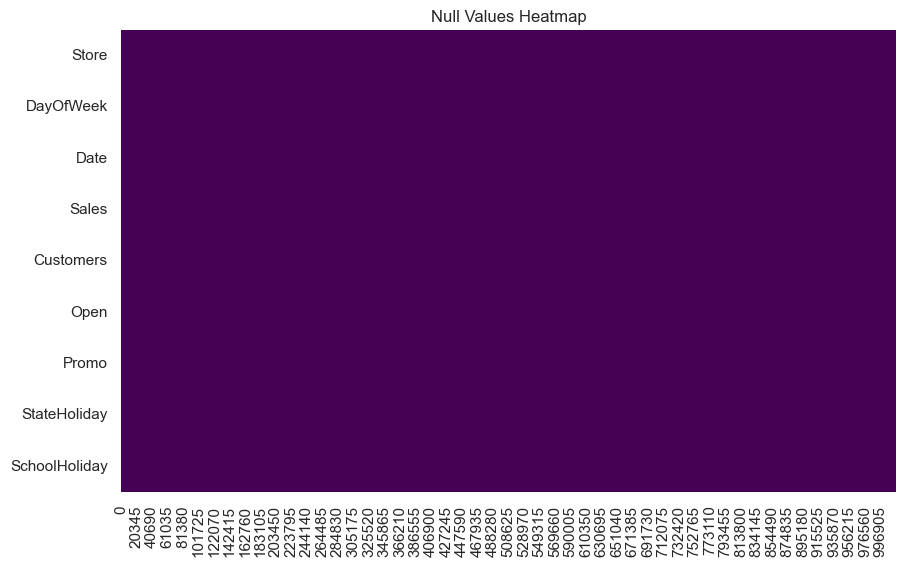

In [12]:
# visulization of train null value 

null_counts=train.isnull().sum()

# Reshaping the data for heatmap
null_matrix = train.isnull().T

# Visualizing null counts using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(null_matrix, cmap='viridis', cbar=False)
plt.title('Null Values Heatmap')
plt.show()

## 2.Test Data 

In [13]:
test.head(2)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0


In [14]:
#checking column type information
print(test.dtypes)

Id                 int64
Store              int64
DayOfWeek          int64
Date              object
Open             float64
Promo              int64
StateHoliday      object
SchoolHoliday      int64
dtype: object


In [15]:
#shape
test.shape

(41088, 8)

In [16]:
#stats of data
test.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,0.854322,0.395833,0.443487
std,11861.228267,320.274496,2.015481,0.352787,0.489035,0.496802
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000


In [17]:
#info
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [18]:
#getting null value count
test.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

#### As we can see in above cell there is no null value is showing but still, we get double check will be visualized same to know better by Heatmap.

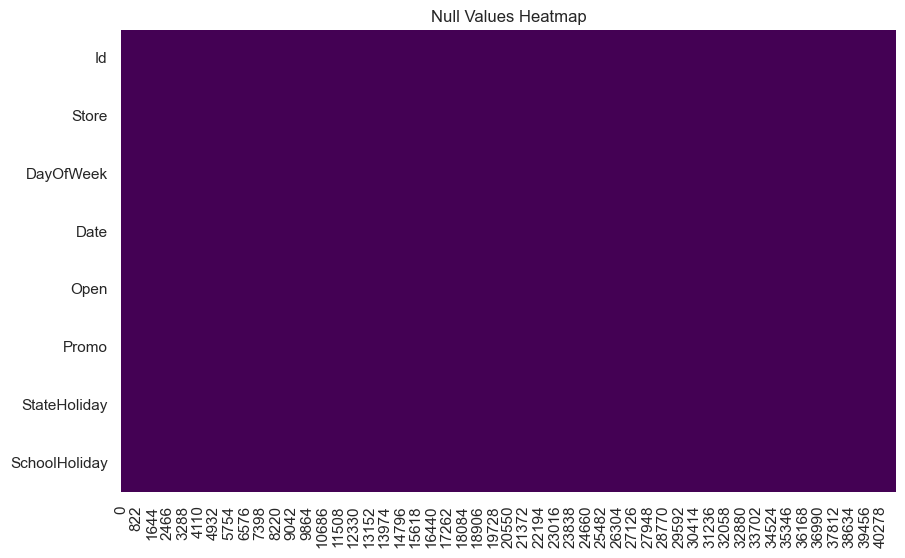

In [19]:
# visulization of test null value 

test_null_counts=test.isnull().sum()

# Reshaping the data for heatmap
test_null_matrix = test.isnull().T

# Visualizing null counts using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(test_null_matrix, cmap='viridis', cbar=False)
plt.title('Null Values Heatmap')
plt.show()

## Store Data

In [20]:
store.head(2)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"


In [21]:
#checking column type information
print(store.dtypes)

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object


In [22]:
#shape
store.shape

(1115, 10)

In [23]:
#info
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [24]:
#getting null value count
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

#### As we can see in above cell there is no null value is showing but still, we get double check will be visualized same to know better by Heatmap.

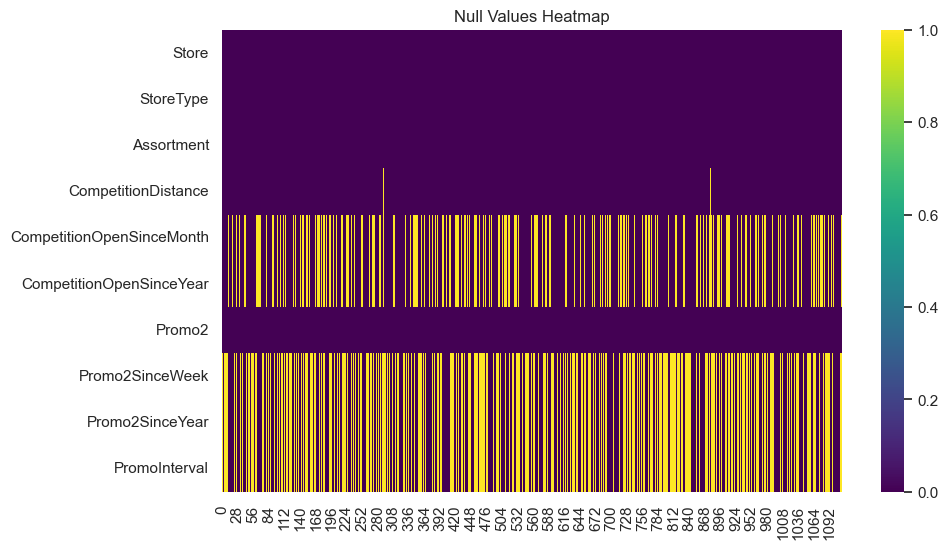

In [25]:
# visulization of store null value 

store_null_counts=store.isnull().sum()

# Reshaping the data for heatmap
store_null_matrix = store.isnull().T

# Visualizing null counts using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(store_null_matrix, cmap='viridis')
plt.title('Null Values Heatmap')
plt.show()

## 4.Sample

In [26]:
sample.head(2)

,Id,Sales
0,1,0
1,2,0


In [27]:
#checking column type information
print(sample.dtypes)

Id       int64
Sales    int64
dtype: object


In [28]:
#shape
sample.shape

(41088, 2)

In [29]:
#info
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Id      41088 non-null  int64
 1   Sales   41088 non-null  int64
dtypes: int64(2)
memory usage: 642.1 KB


In [30]:
#getting null value count
sample.isnull().sum()

Id       0
Sales    0
dtype: int64

#### Before proceeding to handle null values, we will merge the dataframes.

## Merging 'train DataFrame' and 'Store DataFrame'

* Both dataset have common column 'store'
* use column to merge store into train dataset

In [31]:
#converting dateset from 'RangeIndex' to 'datetime formate'
train.index = pd.to_datetime(train.index)


In [32]:
train = pd.read_csv('E:\\DATA science\\Intership Programm\\Pharmaceutical Sales prediction\\train.csv',  parse_dates=[2],index_col = 'Date')
store = pd.read_csv("E:\\DATA science\\Intership Programm\\Pharmaceutical Sales prediction\\store.csv", 
                    low_memory = False)

train['Year'] = train.index.year
train['Month'] = train.index.month
train['Day'] = train.index.day
train['WeekOfYear'] = train.index.weekofyear
train['Dates']=train.apply(lambda x:'%s-%s-%s' % (x['Year'],x['Month'],x['Day']),axis=1)
train['Dates']=pd.to_datetime(train['Dates'])

train_store = pd.merge(train, store, how = 'inner', on = 'Store')



In [33]:
train_store.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Dates,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,1,0,1,2015,7,...,2015-07-31,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,5020,546,1,1,0,1,2015,7,...,2015-07-30,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,4782,523,1,1,0,1,2015,7,...,2015-07-29,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,5011,560,1,1,0,1,2015,7,...,2015-07-28,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,6102,612,1,1,0,1,2015,7,...,2015-07-27,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [34]:
#shape of new dataframe
train_store.shape

(1017209, 22)

## Data Cleaning

In [35]:
#null value calculation of train_store dataframe
train_store.isnull().sum()

Store                             0
DayOfWeek                         0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
Year                              0
Month                             0
Day                               0
WeekOfYear                        0
Dates                             0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

#### Handing null value of Competition Distance

* Before deciding how to treat this,we know there are infinite ways of filling missing values. The most common and simplistic approach is to fill it with either the mean or the median of this variable.

In [36]:
# checking null
train_store[pd.isnull(train_store.CompetitionDistance)].head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Dates,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
263244,291,5,10052,973,1,1,0,1,2015,7,...,2015-07-31,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
263245,291,4,9030,883,1,1,0,1,2015,7,...,2015-07-30,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
263246,291,3,8204,814,1,1,0,1,2015,7,...,2015-07-29,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
263247,291,2,10374,943,1,1,0,1,2015,7,...,2015-07-28,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
263248,291,1,11692,1086,1,1,0,1,2015,7,...,2015-07-27,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN


#### Since the data is time series it is not possible to use the mean or median

* We will use fill method 

In [37]:
# filling competitionDistance  
train_store['CompetitionDistance'] = train_store['CompetitionDistance'].fillna(method='ffill')

#### handling missing values for CompetitionOpenSinceMonth and CompetitionOpenSinceYear

Since we have no information whatsoever on those missing values and no accurate way of filling those values. So those fields are going to be assigned to 0 .

In [38]:
# filling with 0
train_store.CompetitionOpenSinceMonth.fillna(0, inplace = True)
train_store.CompetitionOpenSinceYear.fillna(0,inplace=True)

#### Handling missing values of Promo2SinceWeek, Promo2SinceYear and PromoInterval

This case is pretty straighforward, all the missing values comes from fields where Promo2=0 which means there are no continuous promotional activities for those stores. Having no promotion means those fields have to be 0 as well since they are linked to Promo2.

In [39]:
# asignning 0
train_store.Promo2SinceWeek.fillna(0,inplace=True)
train_store.Promo2SinceYear.fillna(0,inplace=True)
train_store.PromoInterval.fillna(0,inplace=True)

In [40]:
# checking null values in the train_store dataset

null_percentage = (train_store.isnull().mean()) * 100

In [41]:
print("Dataframe contains null values of {:.2f}% out of the given dataset".format(null_percentage.mean()))


Dataframe contains null values of 0.00% out of the given dataset


In [42]:
train_store.isnull().sum()

Store                        0
DayOfWeek                    0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
Year                         0
Month                        0
Day                          0
WeekOfYear                   0
Dates                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

* Since our dataset, train_store, has no missing values, we can proceed with handling outliers.

In [43]:
# statistical description of our train_store dataset
train_store.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,WeekOfYear,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,2.013832e+03,5.846762e+00,1.570279e+01,2.361551e+01,5.420673e+03,4.926878e+00,1.370173e+03,5.005638e-01,1.164767e+01,1.007011e+03
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.773960e-01,3.326097e+00,8.787638e+00,1.443338e+01,7.708049e+03,4.283543e+00,9.353634e+02,4.999999e-01,1.532393e+01,1.005877e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,3.000000e+00,8.000000e+00,1.100000e+01,7.100000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.014000e+03,6.000000e+00,1.600000e+01,2.200000e+01,2.330000e+03,4.000000e+00,2.006000e+03,1.000000e+00,1.000000e+00,2.009000e+03
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,2.014000e+03,8.000000e+00,2.300000e+01,3.500000e+01,6.880000e+03,9.000000e+00,2.011000e+03,1.000000e+00,2.200000e+01,2.012000e+03
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,2.015000e+03,1.200000e+01,3.100000e+01,5.200000e+01,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03


## Reading the description report
### Sales

The minimum sale is 0

The maximum sale is 41551.00

25% of sale is below 3727.000

50% of sale is below 5744.000

75% of sale is below 7856.000

### Customers

The minimum customer is 0

The maximum customer is 7388

25% of customer is below 405

50% of customer is below 609

75% of customer is below 837

In [44]:
# copy
clean_trainScore_df = train_store.copy()

### using test dateset we want to see sell distribution for test dataset

In [45]:
test = pd.read_csv('E:\\DATA science\\Intership Programm\\Pharmaceutical Sales prediction\\train.csv',  parse_dates=[3],index_col = 'Date')

test.index = pd.to_datetime(test.index)
test['Year'] = test.index.year
test['Month'] = test.index.month
test['Day'] = test.index.day
test['WeekOfYear'] = test.index.weekofyear
test['Dates']=test.apply(lambda x:'%s-%s-%s' % (x['Year'],x['Month'],x['Day']),axis=1)
test['Dates']=pd.to_datetime(test['Dates'])





In [46]:
test.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,Dates
Date,,,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015,7,31,31,2015-07-31
2015-07-31,2,5,6064,625,1,1,0,1,2015,7,31,31,2015-07-31
2015-07-31,3,5,8314,821,1,1,0,1,2015,7,31,31,2015-07-31
2015-07-31,4,5,13995,1498,1,1,0,1,2015,7,31,31,2015-07-31
2015-07-31,5,5,4822,559,1,1,0,1,2015,7,31,31,2015-07-31


In [47]:
test.isnull().sum()

Store            0
DayOfWeek        0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
Year             0
Month            0
Day              0
WeekOfYear       0
Dates            0
dtype: int64

## Distribution

### Sales Distribution 

Text(0.5, 1.0, 'Sales Distribution for clean_trainScore_df')

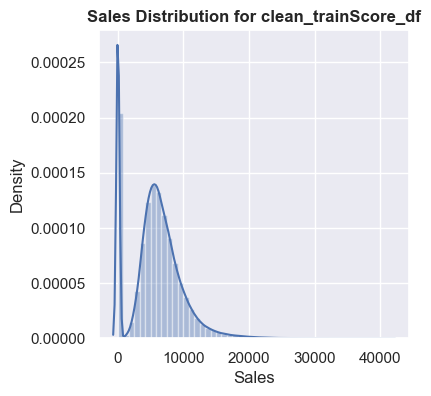

In [48]:
# using displot
plt.figure(figsize=(4, 4))
sns.distplot(clean_trainScore_df['Sales']).set_title('Sales Distribution for clean_trainScore_df',fontdict= { 'fontsize': 12, 'fontweight':'bold'})

In [49]:
#group by storetype
clean_trainScore_df.groupby('StoreType')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
StoreType,,,,,,,,
a,551627.0,5738.179710,3964.028134,0.0,3508.0,5618.0,7860.00,41551.0
b,15830.0,10058.837334,5280.525506,0.0,6227.0,9025.5,13082.75,38722.0
c,136840.0,5723.629246,3721.700886,0.0,3789.0,5766.0,7849.00,31448.0
d,312912.0,5641.819243,3473.393781,0.0,3986.0,5826.0,7691.00,38037.0


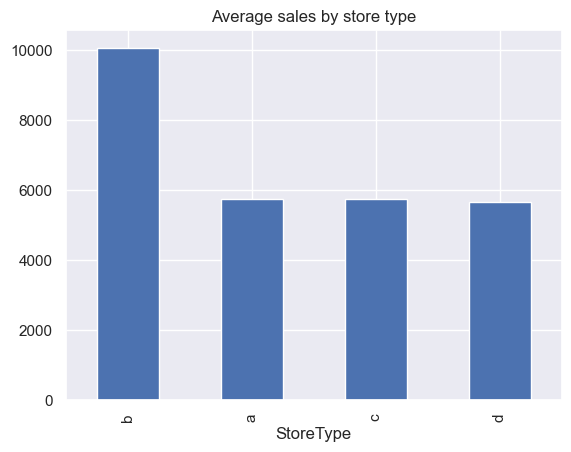

In [50]:
#lets visualized the average score of each store type

group2=clean_trainScore_df.groupby("StoreType")["Sales"].mean().sort_values(ascending=False)
group2.plot(kind="bar")
plt.title("Average sales by store type")
plt.show()

### StoreType B shows better average of Sales among all others.

In [51]:
# customers and sales grouped by storetype
clean_trainScore_df.groupby('StoreType')['Customers', 'Sales'].sum()

,Customers,Sales
StoreType,,
a,363541434,3165334859
b,31465621,159231395
c,92129705,783221426
d,156904995,1765392943


### Important things from the above
* store a has the highest sales and customers
* store d has the second highest sales
* store b has the least sales

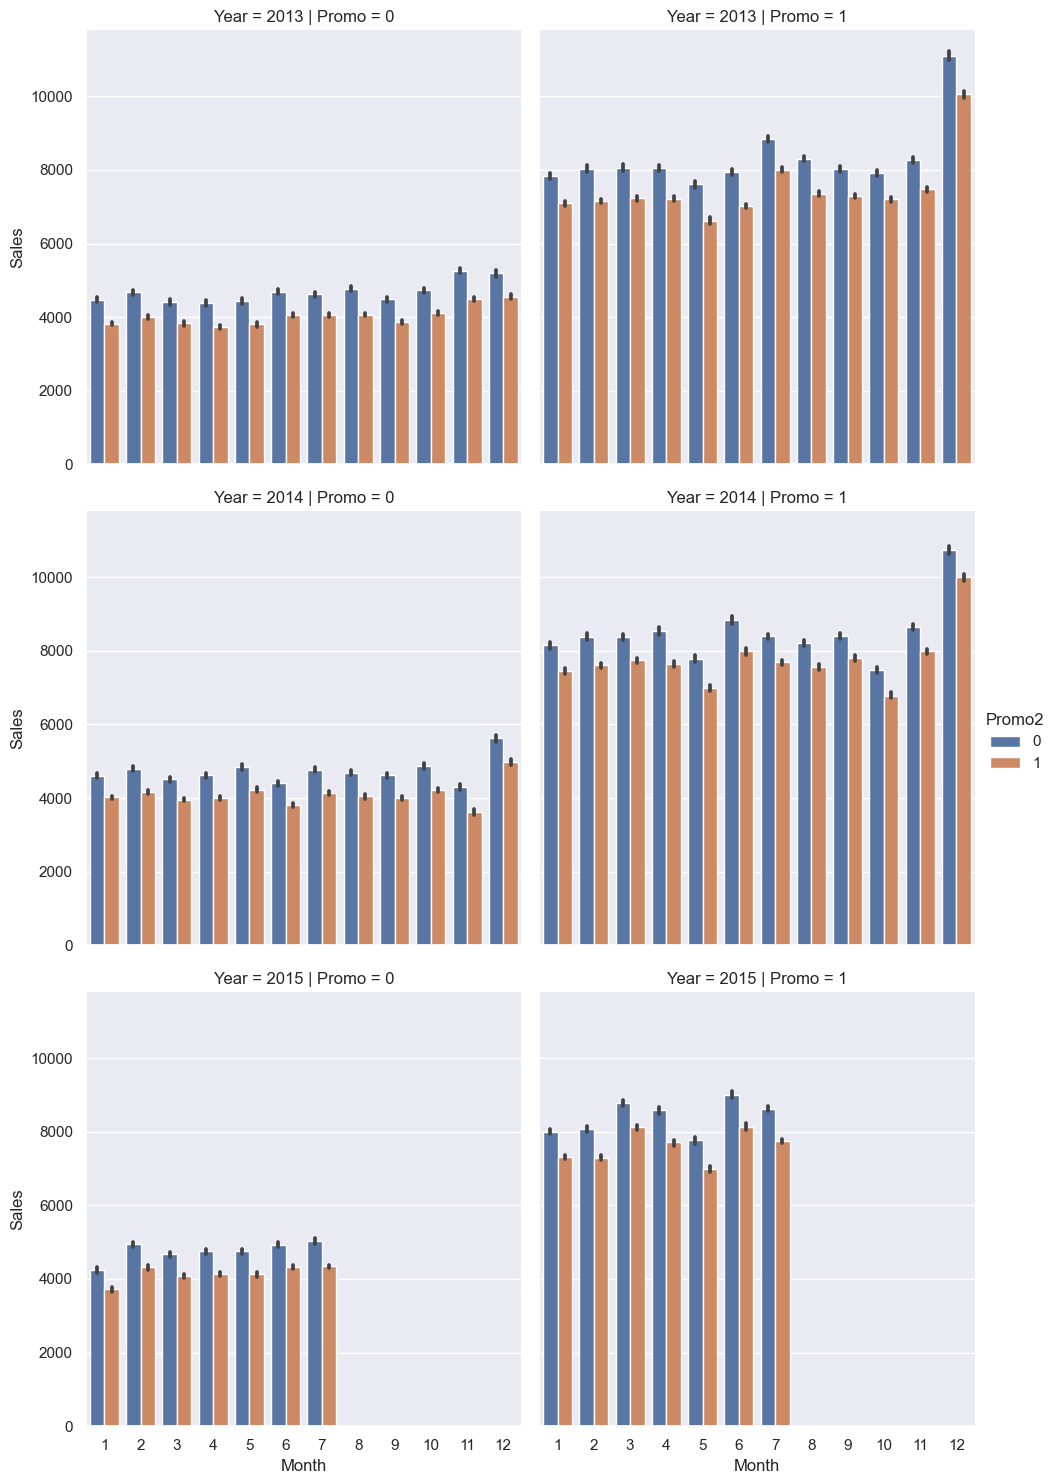

In [52]:
sns.catplot(data = clean_trainScore_df, x='Month', y='Sales',
              col ='Promo', hue='Promo2', row='Year', kind="bar")
plt.show()

1.We see that the campaigns carried out by the stores themselves and the campaigns jointly organized by the company have an increasing effect on sales.
2.Strong sales are achieved when participating in the corporate campaign in the last month of the year.

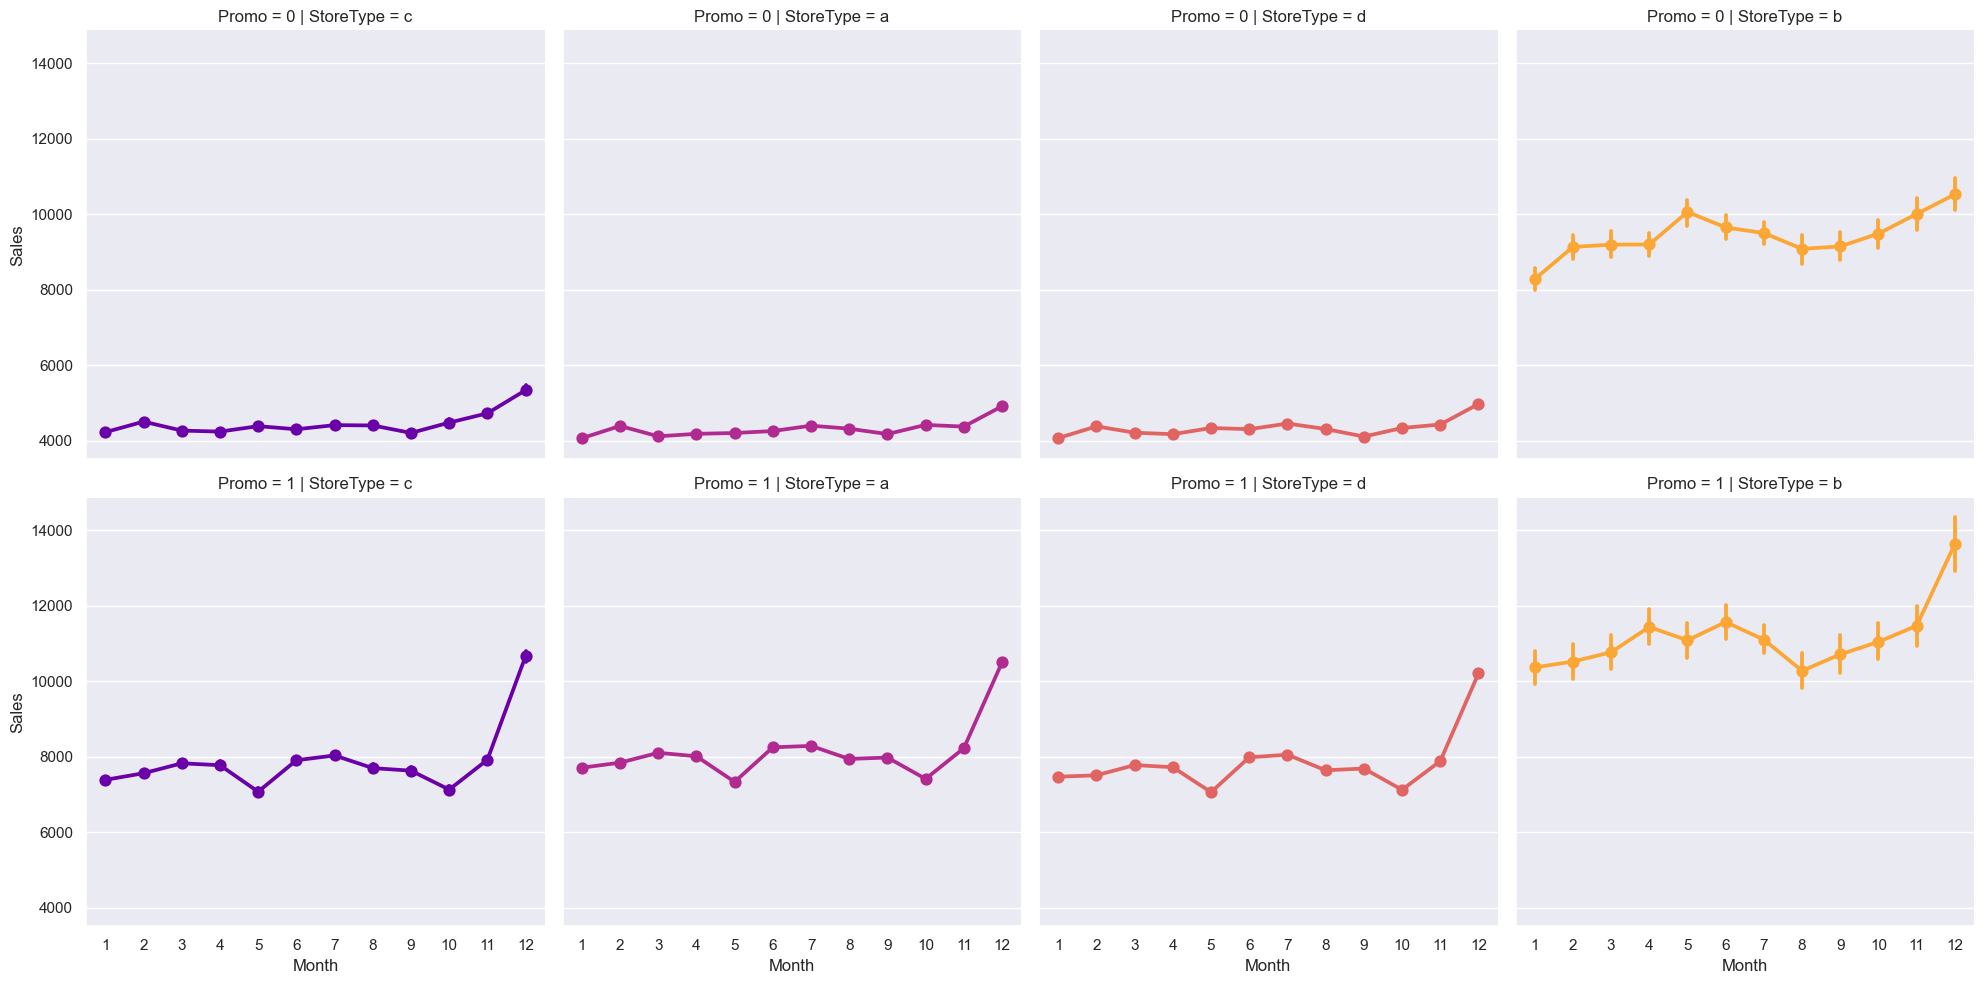

In [53]:
 
color="Blue"
sns.factorplot(data = clean_trainScore_df, x = 'Month', y = "Sales", 
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo', # per promo in the store in rows
               color = color) 

### Test data sales distribution

Text(0.5, 1.0, 'Sales Distribution for test data')

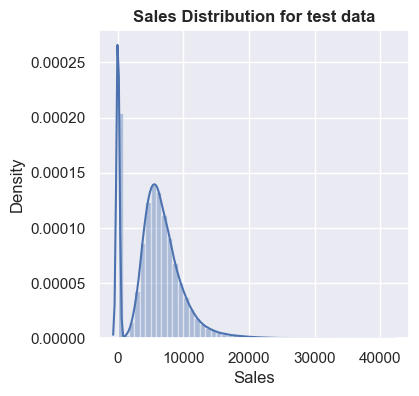

In [54]:
# using displot
plt.figure(figsize=(4, 4))
sns.distplot(test['Sales']).set_title('Sales Distribution for test data',fontdict= { 'fontsize': 12, 'fontweight':'bold'})

After Analysing sale distribution of test and train dataset we have come to know that both the dataset have same sell distribution

### Customers Distribution train_store dataset

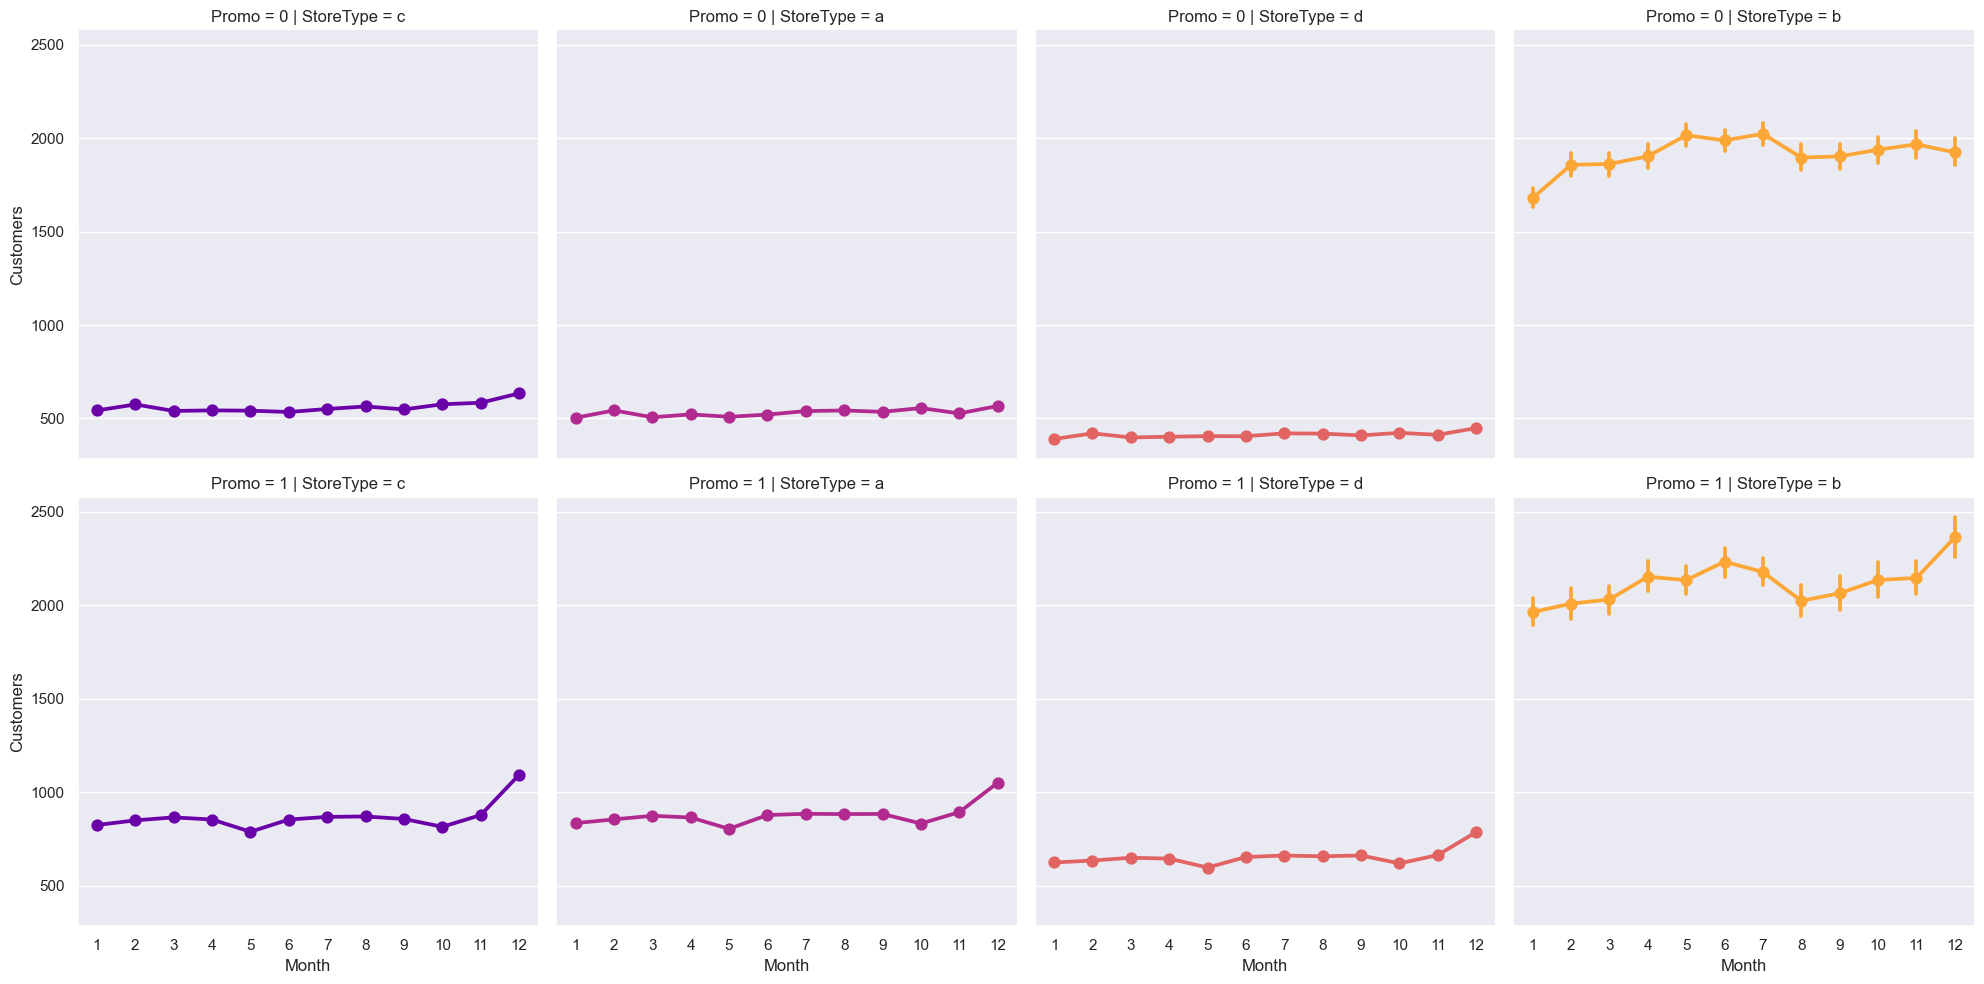

In [55]:
# Customer trends
c="yellow"
sns.factorplot(data = clean_trainScore_df, x = 'Month', y = "Customers", 
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo', # per promo in the store in rows
               color = c) 

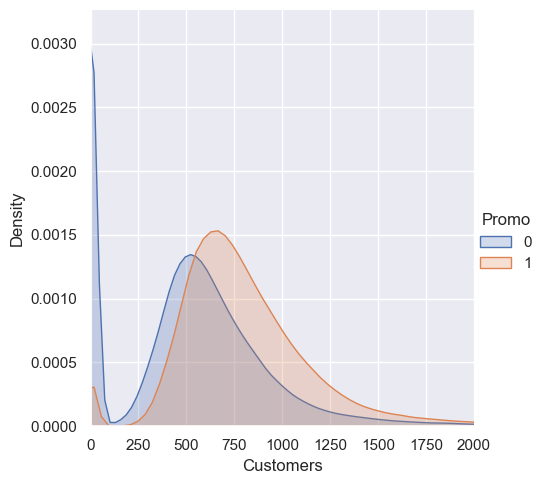

In [56]:
(sns
 .FacetGrid(clean_trainScore_df,
         hue="Promo",
         height=5,
         xlim=(0,2000))
 .map(sns.kdeplot,"Customers",shade=True)
 .add_legend()
);

As it is observed from the above figuers, some outliers are shown in both sales and customers distribuiton

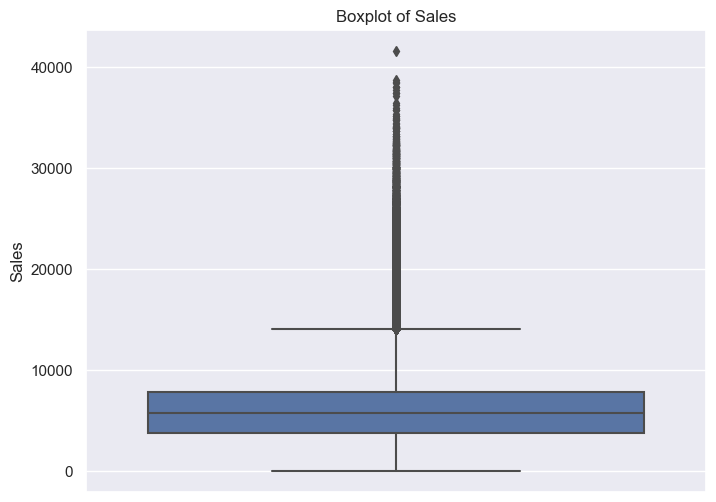

In [57]:
import seaborn as sns

# Box plot for 'Sales' column using seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(y=clean_trainScore_df['Sales'])
plt.title('Boxplot of Sales')
plt.ylabel('Sales')
plt.show()


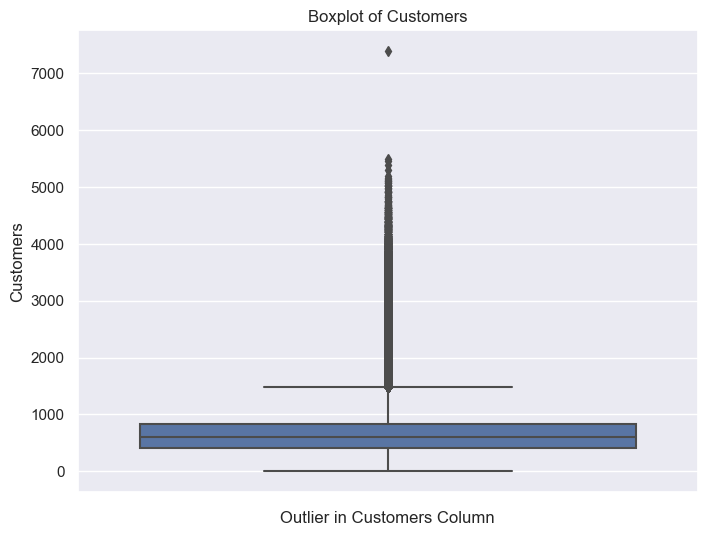

In [58]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=clean_trainScore_df, y='Customers')
plt.title('Boxplot of Customers')
plt.ylabel('Customers')
plt.xlabel('Outlier in Customers Column')
plt.show()

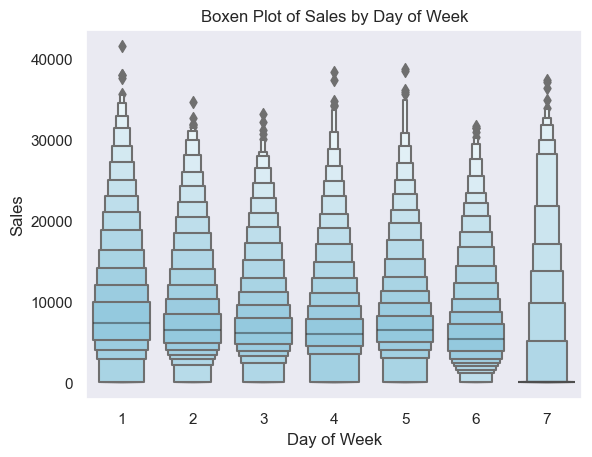

In [59]:
sns.boxenplot(data=clean_trainScore_df, scale="linear", x="DayOfWeek", y="Sales", color="skyblue")
plt.title('Boxen Plot of Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Sales')
plt.grid(axis='y')
plt.show()

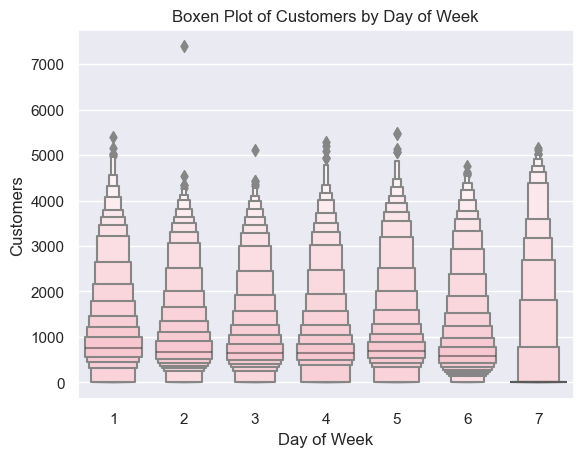

In [60]:
sns.boxenplot(y="Customers", x="DayOfWeek", data=clean_trainScore_df, scale="linear", color="pink")
plt.title('Boxen Plot of Customers by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Customers')
 
plt.show()

The data shows outliers, this can be caused due to Holiday or promotion effect. the outliers need to be handled

In [61]:
# Replace outliers in the 'Customers' column with the median value
column = 'Customers'
Q1 = clean_trainScore_df[column].quantile(0.25)
Q3 = clean_trainScore_df[column].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

clean_trainScore_df[column] = clean_trainScore_df[column].apply(
    lambda x: clean_trainScore_df[column].median() if x < lower_bound or x > upper_bound else x
)
 

In [62]:
# Replace outliers in the 'Sales' column with the median value
column = 'Sales'
Q1 = clean_trainScore_df[column].quantile(0.25)
Q3 = clean_trainScore_df[column].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

clean_trainScore_df[column] = clean_trainScore_df[column].apply(
    lambda x: clean_trainScore_df[column].median() if x < lower_bound or x > upper_bound else x
)
 

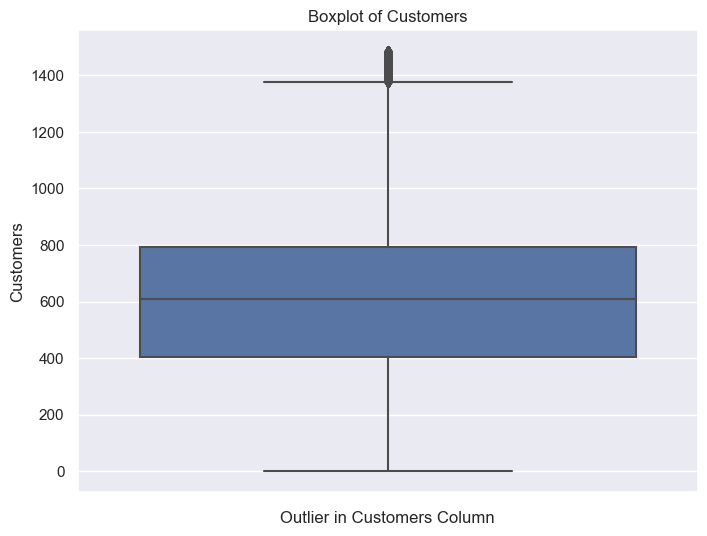

In [63]:
#Boxplot of Customers column after replacing outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=clean_trainScore_df, y='Customers')
plt.title('Boxplot of Customers')
plt.ylabel('Customers')
plt.xlabel('Outlier in Customers Column')
plt.show()

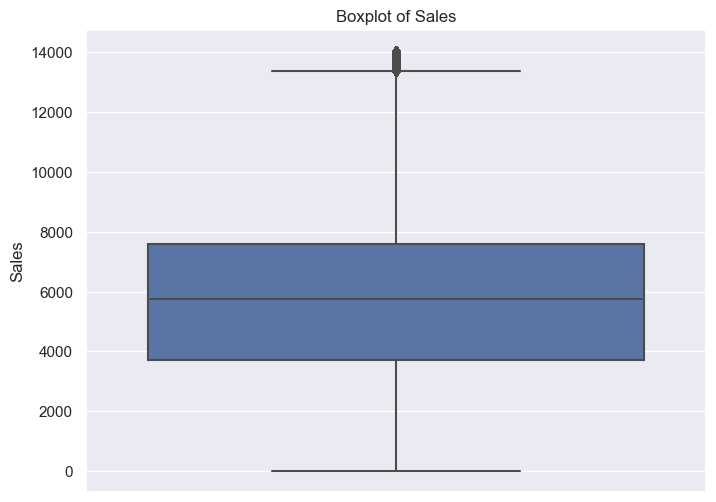

In [64]:
#Boxplot of Sales column after replacing outliers
plt.figure(figsize=(8, 6))
sns.boxplot(y=clean_trainScore_df['Sales'])
plt.title('Boxplot of Sales')
plt.ylabel('Sales')
plt.show()


### DayOfWeek Vs Open distribution

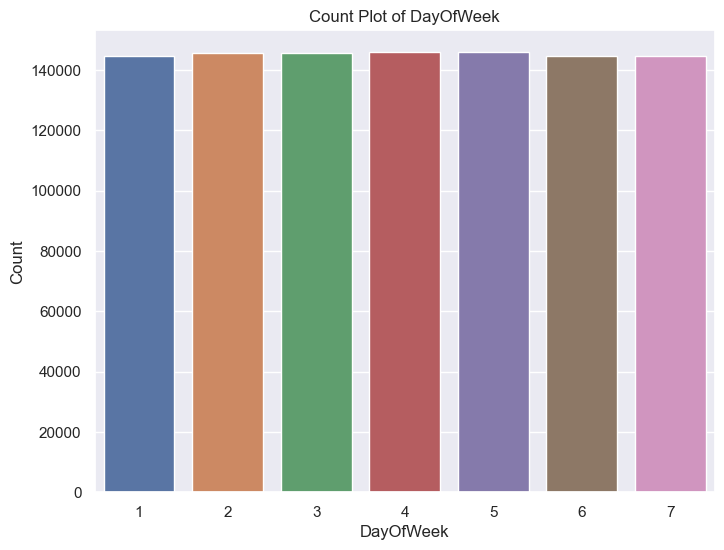

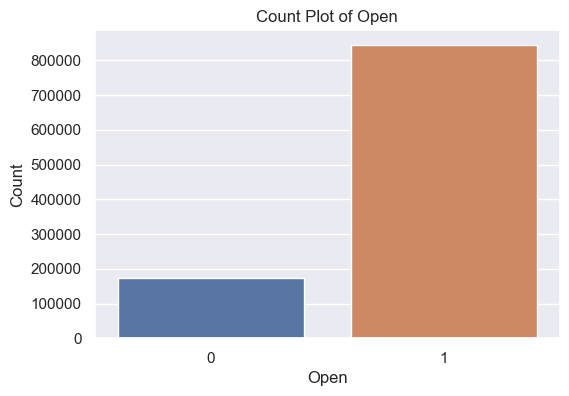

In [65]:
# Count plot for 'DayOfWeek'
plt.figure(figsize=(8, 6))
sns.countplot(data=clean_trainScore_df, x='DayOfWeek')
plt.title('Count Plot of DayOfWeek')
plt.xlabel('DayOfWeek')
plt.ylabel('Count')
plt.show()

# Count plot for 'Open' 
plt.figure(figsize=(6, 4))
sns.countplot(data=clean_trainScore_df, x='Open')
plt.title('Count Plot of Open')
plt.xlabel('Open')
plt.ylabel('Count')
plt.show()

### State Holiday, School Holidays & Promo distribution

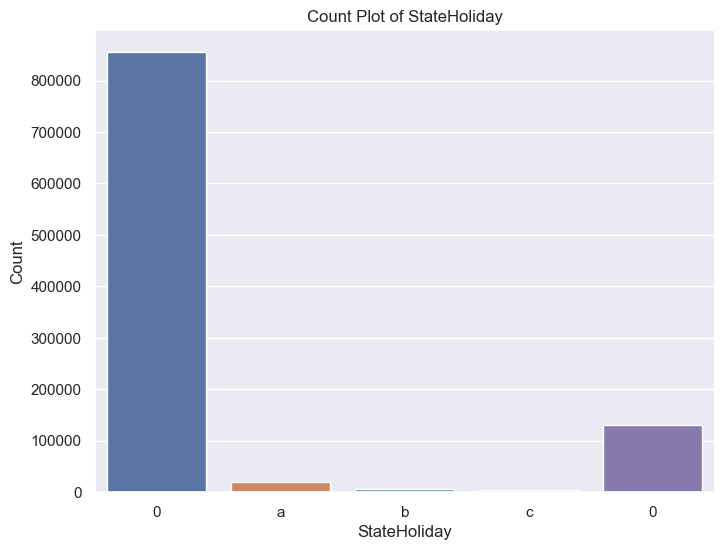

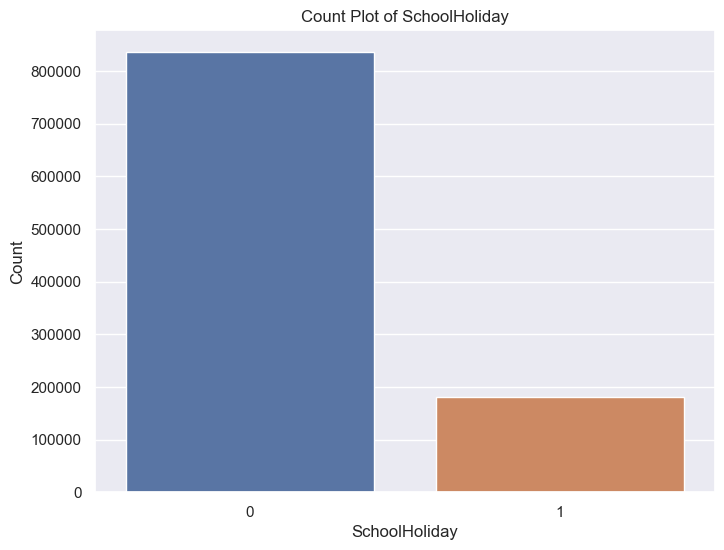

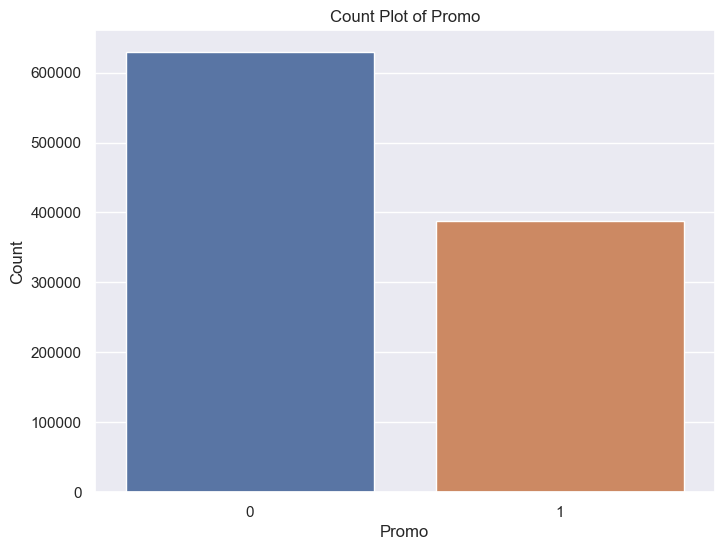

In [66]:
# Count plot for 'StateHoliday' 
plt.figure(figsize=(8, 6))
sns.countplot(data=clean_trainScore_df, x='StateHoliday')
plt.title('Count Plot of StateHoliday')
plt.xlabel('StateHoliday')
plt.ylabel('Count')
plt.show()

# Count plot for 'SchoolHoliday' 
plt.figure(figsize=(8, 6))
sns.countplot(data=clean_trainScore_df, x='SchoolHoliday')
plt.title('Count Plot of SchoolHoliday')
plt.xlabel('SchoolHoliday')
plt.ylabel('Count')
plt.show()

# Count plot for 'Promo'
plt.figure(figsize=(8, 6))
sns.countplot(data=clean_trainScore_df, x='Promo')
plt.title('Count Plot of Promo')
plt.xlabel('Promo')
plt.ylabel('Count')
plt.show()

### Store distribution

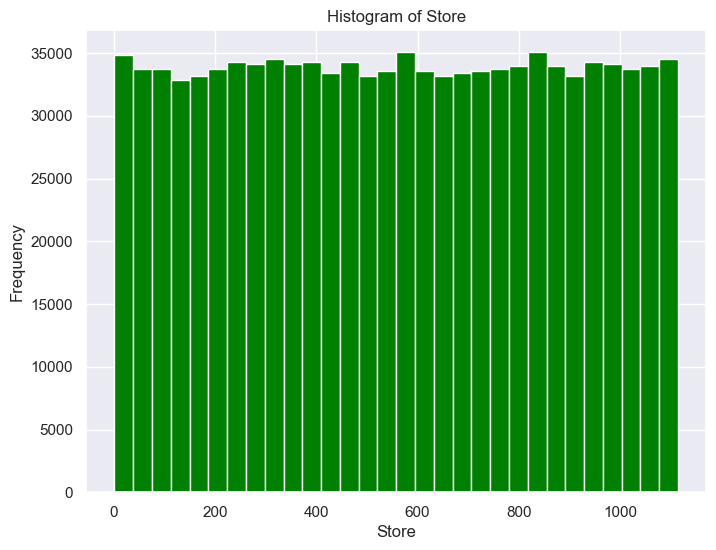

In [67]:
# Histplot for 'Store'
plt.figure(figsize=(8, 6))
plt.hist(clean_trainScore_df['Store'], color='green', bins=30)
plt.title('Histogram of Store')
plt.xlabel('Store')
plt.ylabel('Frequency')
plt.show()

### Year, Month & WeekOfYear distribution

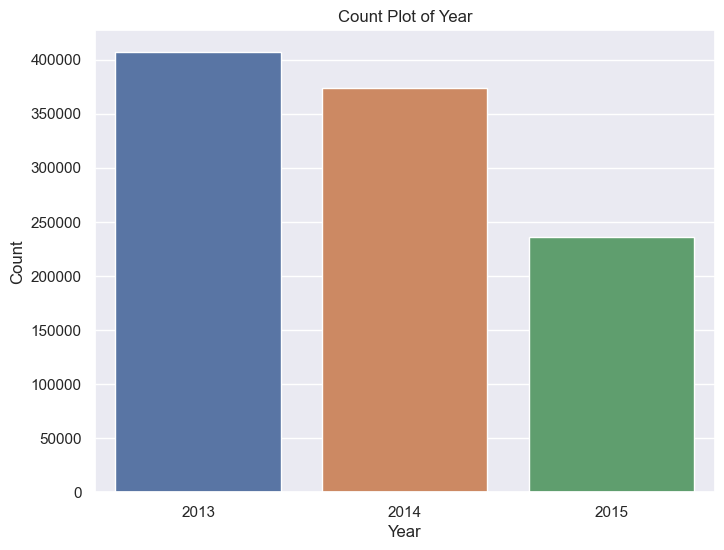

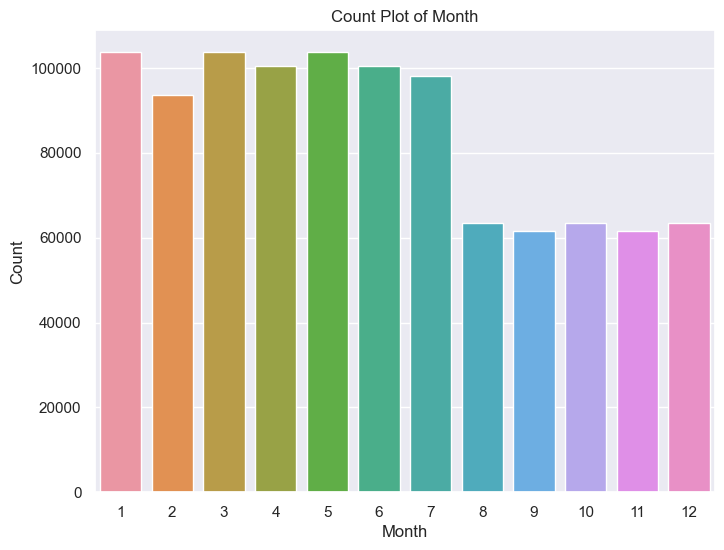

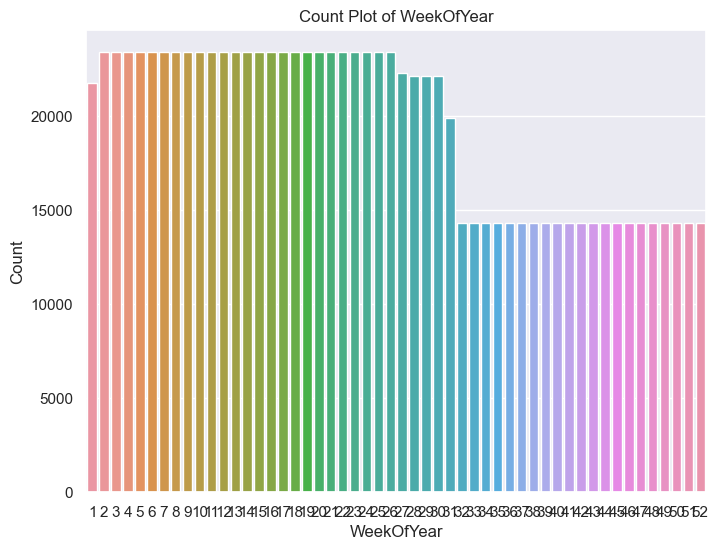

In [68]:
# Count plot for 'Year' 
plt.figure(figsize=(8, 6))
sns.countplot(data=clean_trainScore_df, x='Year')
plt.title('Count Plot of Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

# Count plot for 'Month' 
plt.figure(figsize=(8, 6))
sns.countplot(data=clean_trainScore_df, x='Month')
plt.title('Count Plot of Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

# Count plot for 'WeekOfYear'
plt.figure(figsize=(8, 6))
sns.countplot(data=clean_trainScore_df, x='WeekOfYear')
plt.title('Count Plot of WeekOfYear')
plt.xlabel('WeekOfYear')
plt.ylabel('Count')
plt.show()

### CompetitionDistance

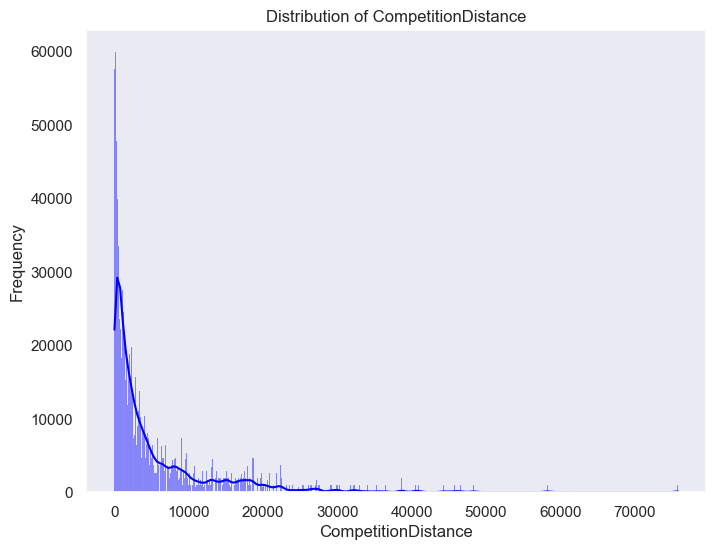

In [69]:
# Distribution plot for 'CompetitionDistance' using Seaborn's distplot

sns.set(style="dark")

plt.figure(figsize=(8, 6))
sns.histplot(clean_trainScore_df['CompetitionDistance'], kde=True, color='blue')
plt.title('Distribution of CompetitionDistance')
plt.xlabel('CompetitionDistance')
plt.ylabel('Frequency')
plt.show()

### StoreType, Assortment and Promo2 distribution

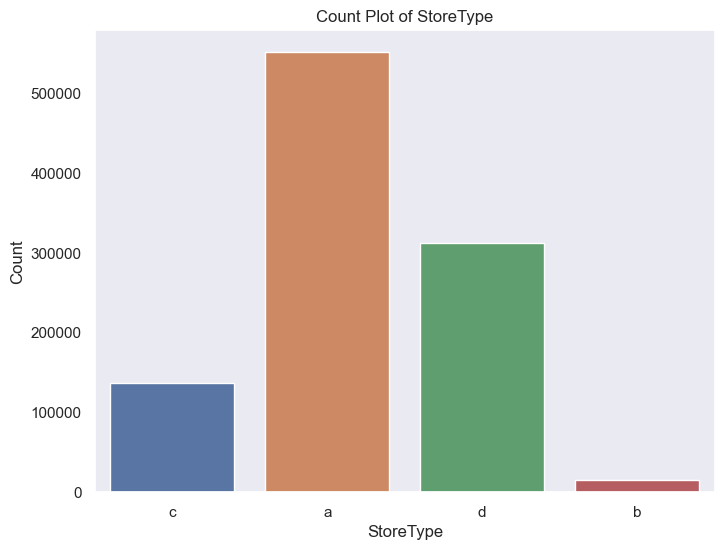

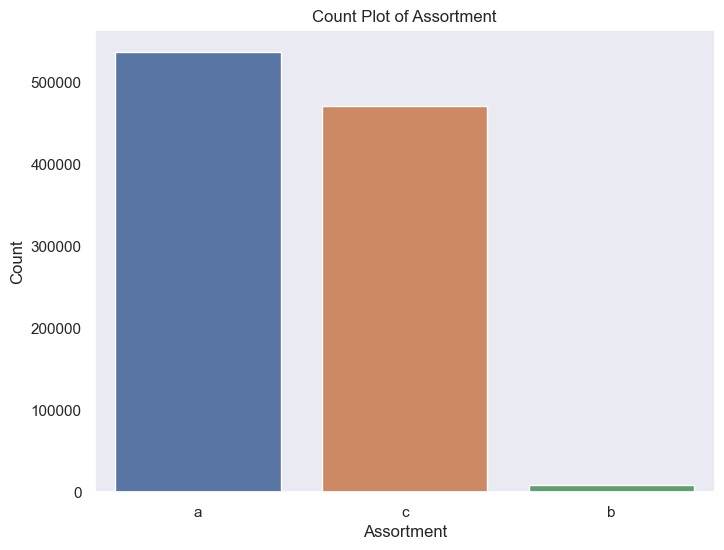

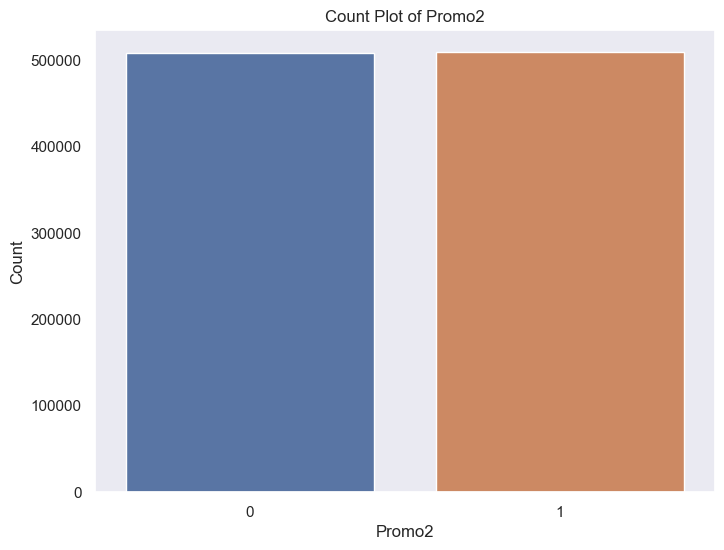

In [70]:
# Count plot for 'StoreType' 
plt.figure(figsize=(8, 6))
sns.countplot(data=clean_trainScore_df, x='StoreType')
plt.title('Count Plot of StoreType')
plt.xlabel('StoreType')
plt.ylabel('Count')
plt.show()

# Count plot for 'Assortment'
plt.figure(figsize=(8, 6))
sns.countplot(data=clean_trainScore_df, x='Assortment')
plt.title('Count Plot of Assortment')
plt.xlabel('Assortment')
plt.ylabel('Count')
plt.show()

# Count plot for 'Promo2' 
plt.figure(figsize=(8, 6))
sns.countplot(data=clean_trainScore_df, x='Promo2')
plt.title('Count Plot of Promo2')
plt.xlabel('Promo2')
plt.ylabel('Count')
plt.show()

In [71]:
### Calculating sales per customer 

clean_trainScore_df['SalesperCustomer']=clean_trainScore_df['Sales']/clean_trainScore_df['Customers']

In [72]:
clean_trainScore_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,SalesperCustomer
0,1,5,5263.0,555.0,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.482883
1,1,4,5020.0,546.0,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.194139
2,1,3,4782.0,523.0,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.143403
3,1,2,5011.0,560.0,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,8.948214
4,1,1,6102.0,612.0,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.970588


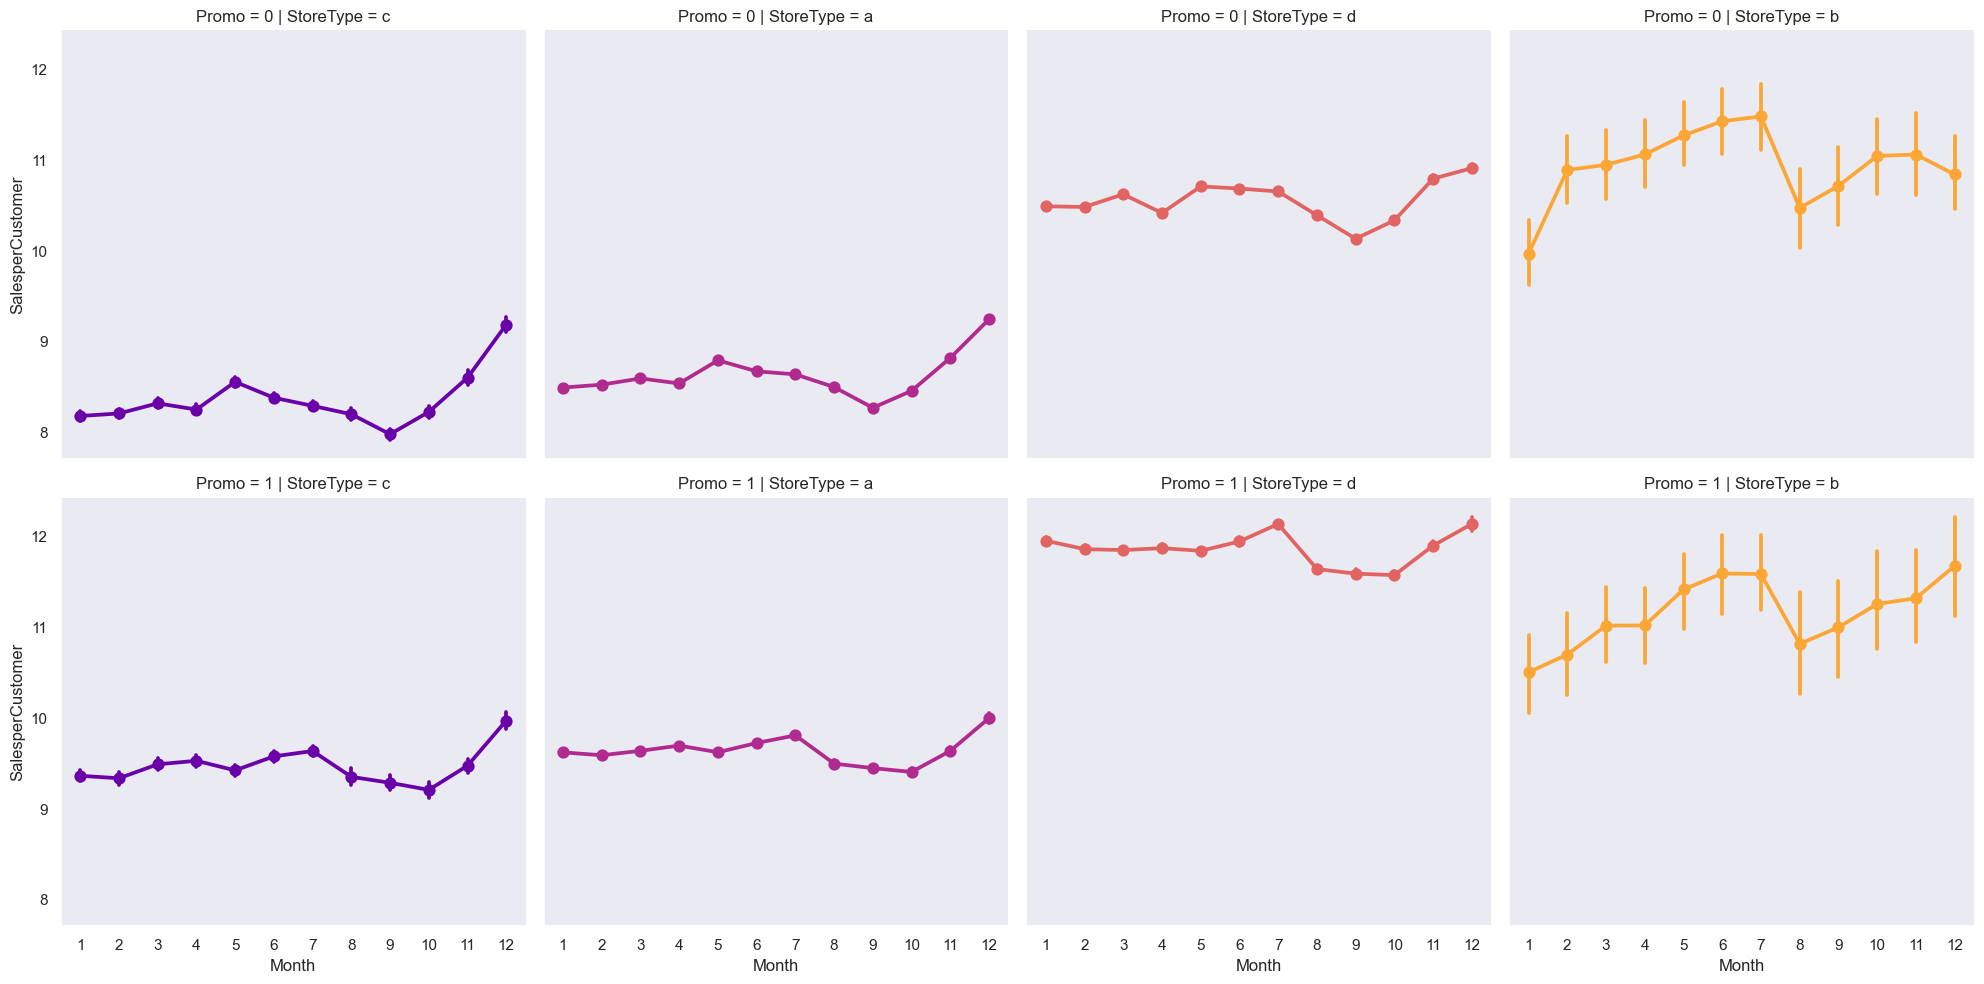

In [73]:
# sale per customer trends
c="green"
sns.factorplot(data = clean_trainScore_df, x = 'Month', y = "SalesperCustomer", 
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo', # per promo in the store in rows
               color = c) 

### correlation Analysis

In [74]:
df_correlation=clean_trainScore_df[['Store', 'DayOfWeek', 'Sales', 'Customers', 'Promo',
        'SchoolHoliday',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'SalesperCustomer', 'Month', 'Year',
       'StateHoliday', 'Assortment', 'StoreType',
       'PromoInterval']]

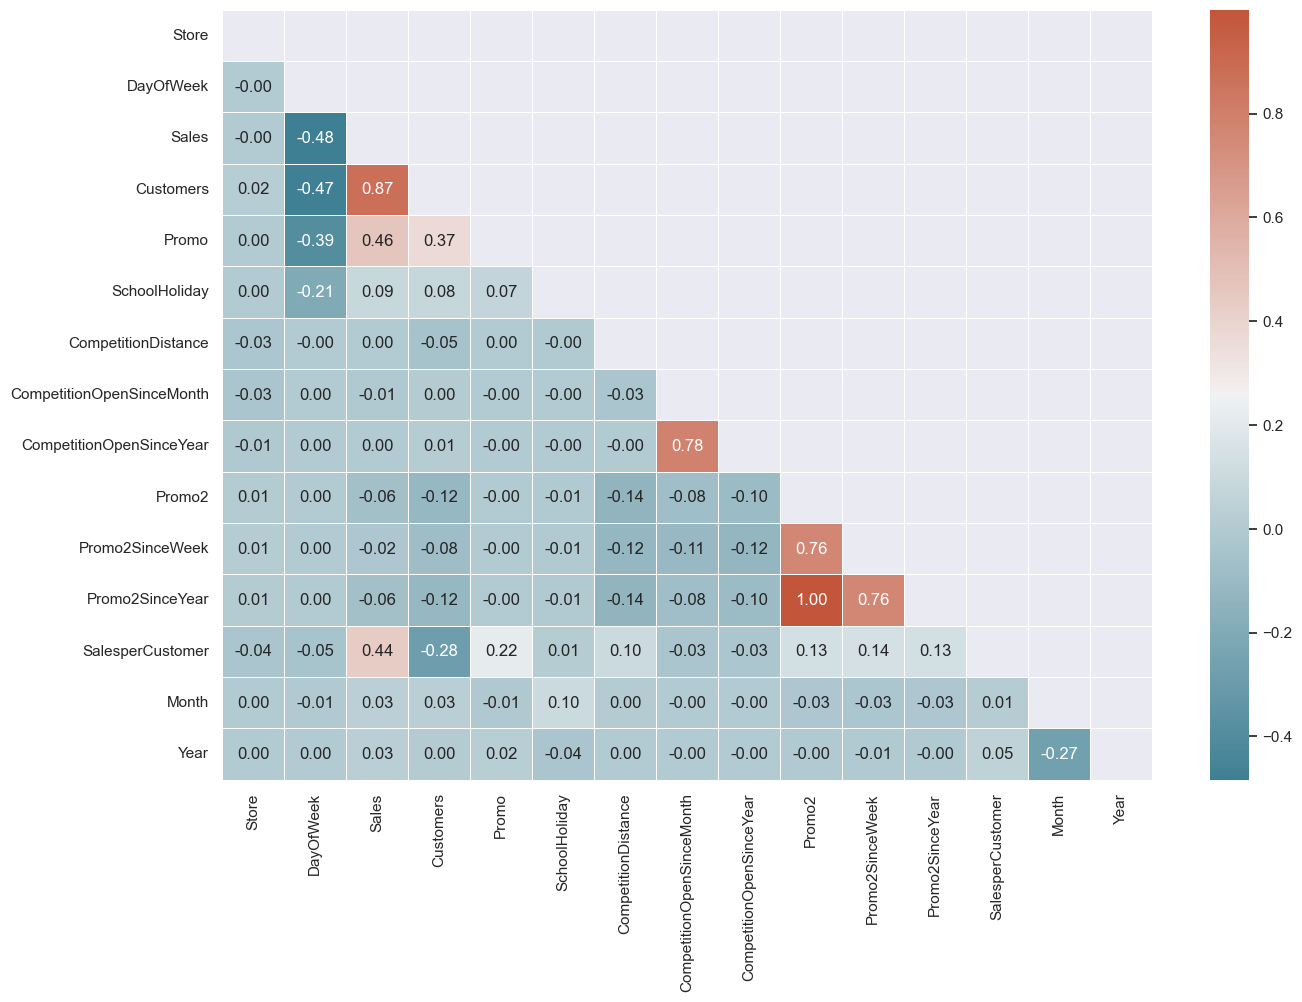

In [75]:
upper_triangle = np.zeros_like(df_correlation.corr(), dtype=bool)
upper_triangle[np.triu_indices_from(upper_triangle)] = True

f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_correlation.corr(), ax=ax, mask=upper_triangle, annot=True, fmt='.2f', linewidths=0.5, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.show()


### According to above result we have observed 

* The number of Customers and Sales have strong relation
* Positive correlation between the store had a running promotion (Promo equal to 1) and amount of Customers.
* The same negative correlation is observed between the presence of the promotion in the store and the day of a week.

In [76]:
clean_trainScore_df.isnull().sum()

Store                             0
DayOfWeek                         0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
Year                              0
Month                             0
Day                               0
WeekOfYear                        0
Dates                             0
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth         0
CompetitionOpenSinceYear          0
Promo2                            0
Promo2SinceWeek                   0
Promo2SinceYear                   0
PromoInterval                     0
SalesperCustomer             172869
dtype: int64

In [77]:
#filling the null value of SalesperCustomer
clean_trainScore_df.SalesperCustomer.fillna(0, inplace = True)

In [78]:
clean_trainScore_df.isnull().sum()

Store                        0
DayOfWeek                    0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
Year                         0
Month                        0
Day                          0
WeekOfYear                   0
Dates                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
SalesperCustomer             0
dtype: int64

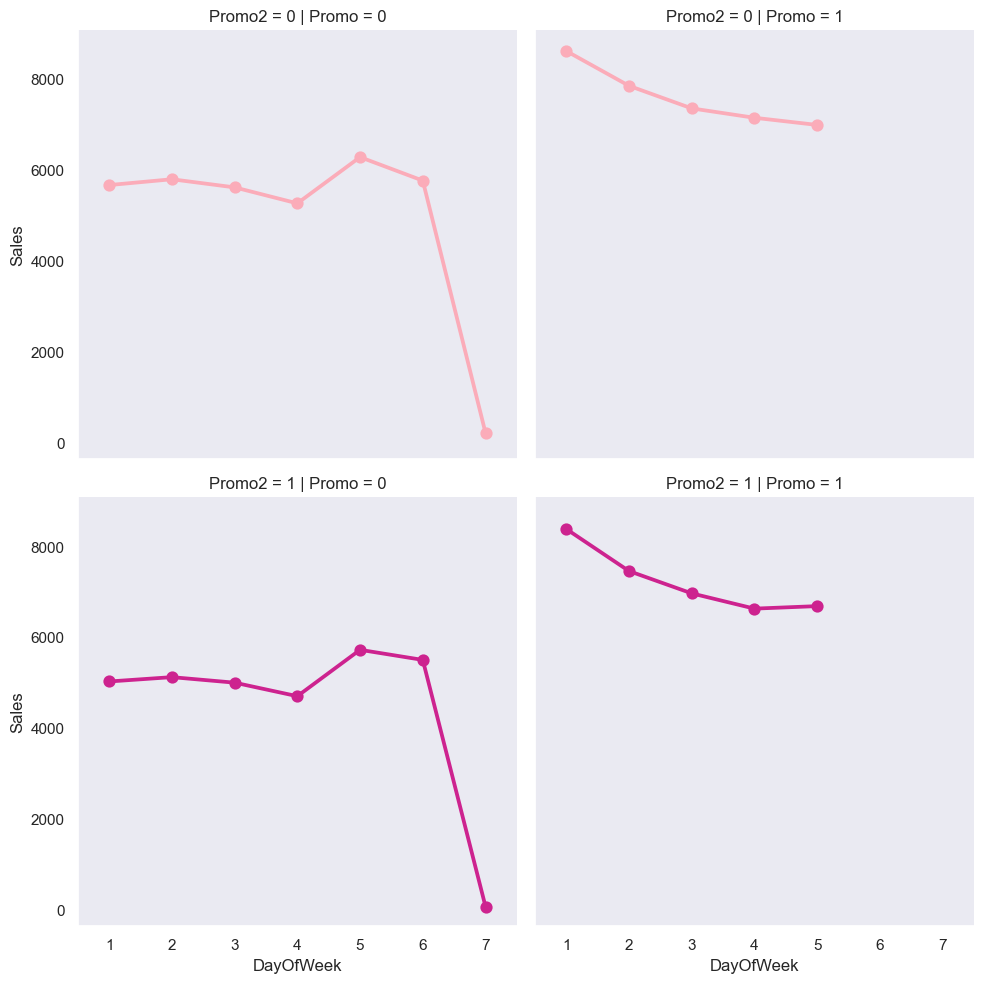

In [79]:
# DayOfWeek vs Sales
sns.factorplot(data = clean_trainScore_df, x = 'DayOfWeek', y = "Sales", 
               col = 'Promo', 
               row = 'Promo2',
               hue = 'Promo2',
               palette = 'RdPu') 

### Observation

* In case of no promotion, both Promo and Promo2 are equal to 0, Sales tend to down on Sunday (!).
* On the contrary, stores that run the promotion tend to make most of the Sales on Monday. This fact could be a good - indicator for Rossmann marketing campaigns. The same trend follow the stores which have both promotion at the same time (Promo and Promo2 are equal to 1).
* Promo2 alone doesn't seem to be correlated to any significant change in the Sales amount. This can be also prooved by the blue pale area on the heatmap above

In [80]:
clean_trainScore_df.shape

(1017209, 23)

### Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

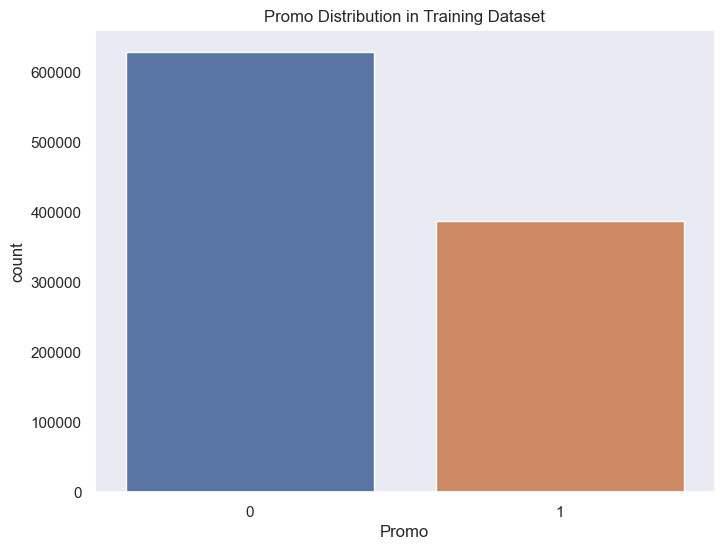

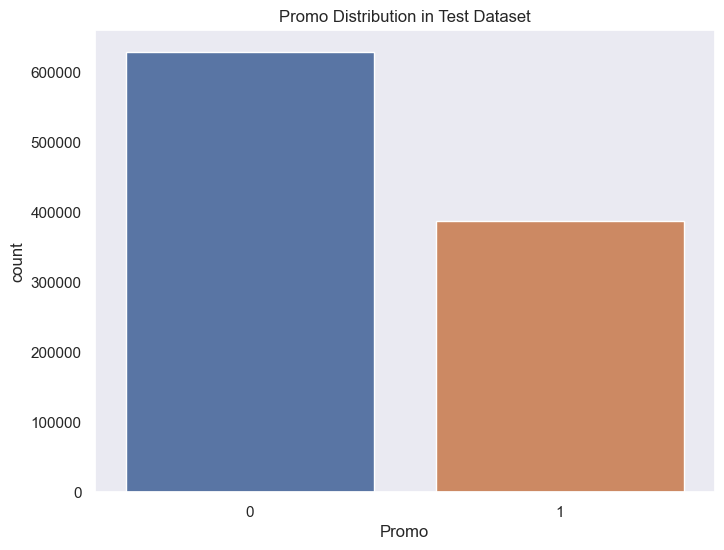

In [81]:
# Plotting 'Promo' distribution in the training dataset
plt.figure(figsize=(8, 6))
sns.countplot(data=clean_trainScore_df, x='Promo')
plt.title('Promo Distribution in Training Dataset')

plt.show()

# Plotting 'Promo' distribution in the test dataset
plt.figure(figsize=(8, 6))
sns.countplot(data=test, x='Promo')
plt.title('Promo Distribution in Test Dataset')

plt.show()

In [82]:
clean_trainScore=clean_trainScore_df.copy()

### Check & compare sales behavior before, during and after holidays

In [83]:
# Converting '0' to integer in 'StateHoliday' column
clean_trainScore['StateHoliday'] = clean_trainScore['StateHoliday'].replace({'0': 0})

# Mapping other values for better interpretation
clean_trainScore['StateHoliday'] = clean_trainScore['StateHoliday'].replace({0: 'No Holiday','a': 'Public Holiday', 'b': 'Easter Holiday', 'c': 'Christmas'})


In [84]:
# Calculateing mean sales for each StateHoliday
holiday_sales = clean_trainScore.groupby('StateHoliday')['Sales'].mean().reset_index()


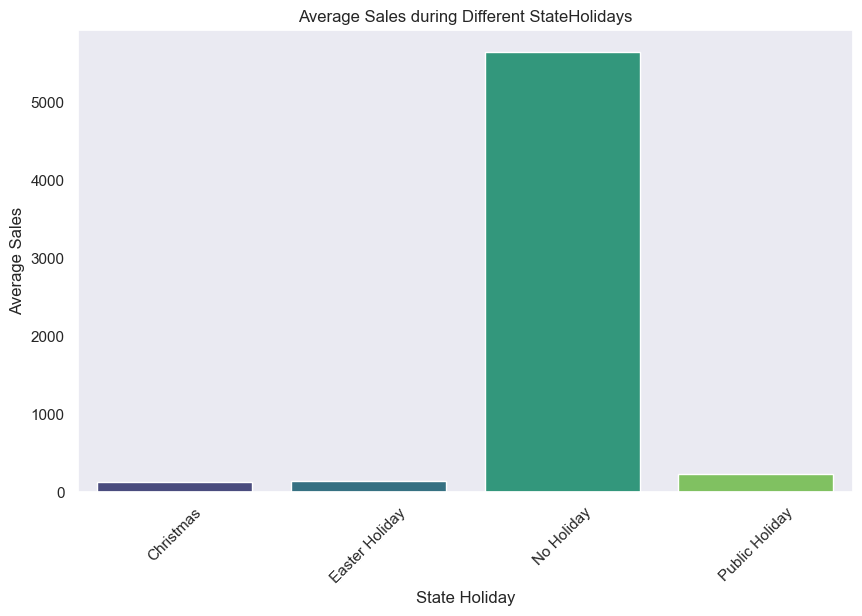

In [85]:
# Plotting sales behavior for each StateHoliday 
plt.figure(figsize=(10, 6))
sns.barplot(data=holiday_sales, x='StateHoliday', y='Sales', palette='viridis')
plt.title('Average Sales during Different StateHolidays')
plt.xlabel('State Holiday')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()


### Answer by above barplot: 

observing the state holiday of public holiday, Easter Holiday, christmas and no holiday

There is a very low purchase frequency during holidays
high sales after holidaies

### Find out any seasonal (Christmas, Easter etc) purchase behaviours,

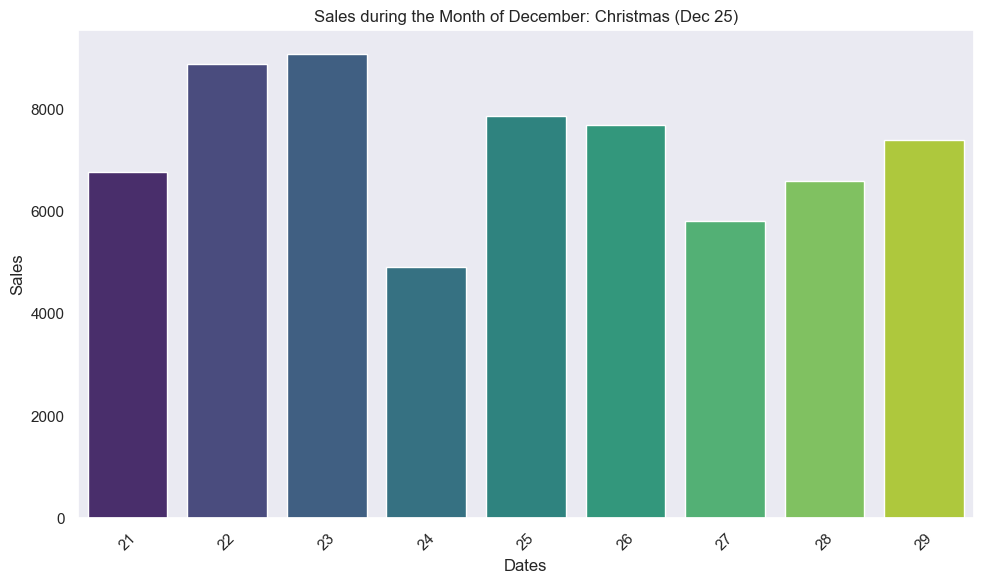

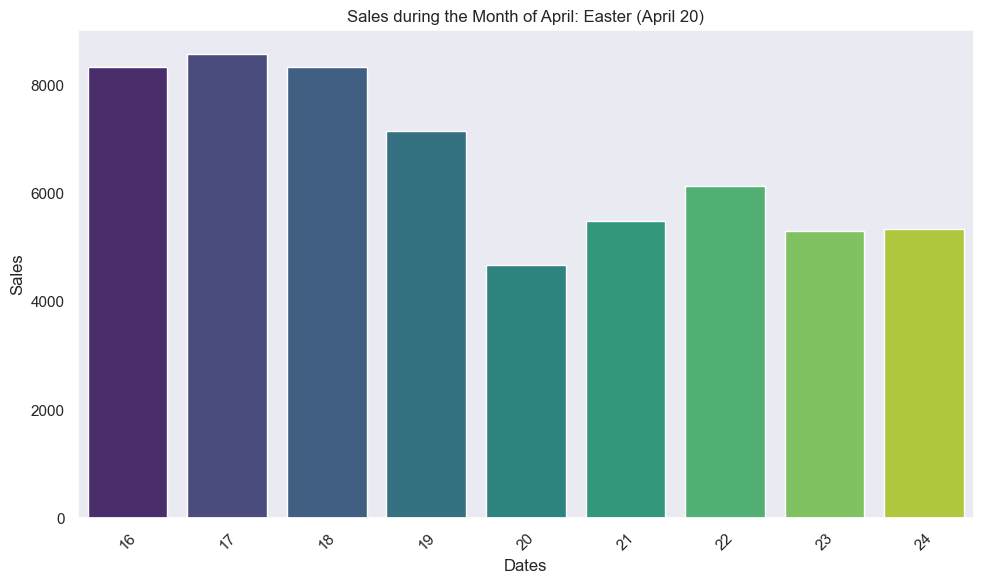

In [86]:
open_store = clean_trainScore[(clean_trainScore.Open == 1) & (clean_trainScore.Year == 2014)]

christmass_month = 12
eastern_month = 4

christmass_month = open_store[open_store.Month == christmass_month]
eastern_month = open_store[open_store.Month == eastern_month]

around_christmas = christmass_month[(christmass_month['Day'] > 20) & (christmass_month['Day'] < 30)]
around_christmas = around_christmas[['Day', 'Sales']].groupby('Day').mean()


around_eastern = eastern_month[(eastern_month['Day'] > 15) & (eastern_month['Day'] < 25)]
around_eastern = around_eastern[['Day', 'Sales']].groupby('Day').mean()

# Plotting Sales around Christmas (December 25) using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=around_christmas.index, y=around_christmas['Sales'], palette='viridis')
plt.title('Sales during the Month of December: Christmas (Dec 25)')
plt.xlabel('Dates')
plt.ylabel('Sales')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

# Plotting Sales around Easter (April 20) using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=around_eastern.index, y=around_eastern['Sales'], palette='viridis')
plt.title('Sales during the Month of April: Easter (April 20)')
plt.xlabel('Dates')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* Based on the bar plots, it's evident that sales surge before both holidays. Post-holidays, Easter exhibits increased sales, whereas Christmas maintains consistent, robust sales on the day itself. Sales are relatively higher on Christmas but comparatively lower on Easter during the holiday itself.

### What can you say about the correlation between sales and number of customers?

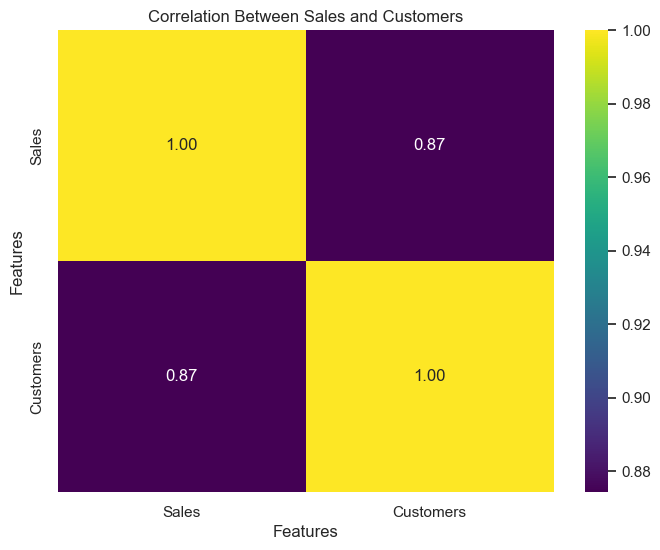

In [87]:
# Calculate the correlation matrix
correlation_matrix = clean_trainScore[['Sales', 'Customers']].corr()

# Plotting the heatmap 
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Between Sales and Customers')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

* The sales and customer figures show a positive correlation, indicating that as the number of customers increases, so does the sales volume.

### How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?

<Figure size 1200x700 with 0 Axes>

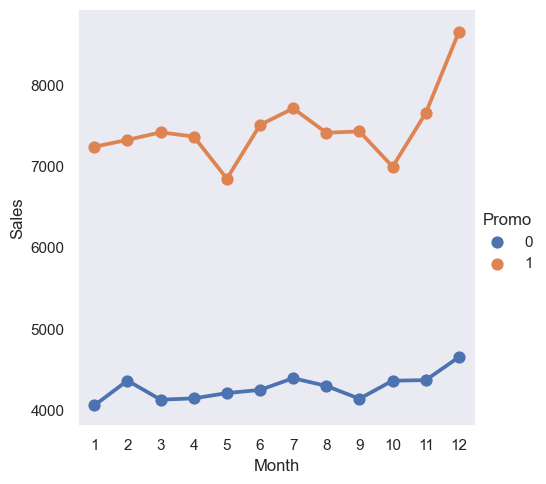

In [88]:
plt.figure(figsize=(12,7))
sns.factorplot(data = clean_trainScore, x ="Month", y = "Sales",
               hue = 'Promo',
              sharex=False)

<Figure size 1200x700 with 0 Axes>

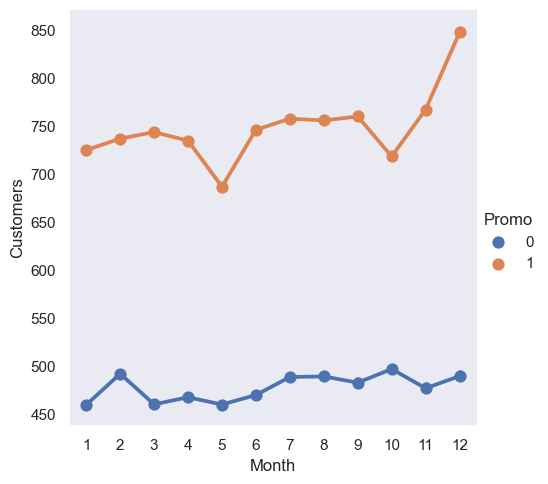

In [89]:
plt.figure(figsize=(12,7))
sns.factorplot(data = clean_trainScore, x ="Month", y = "Customers",
               hue = 'Promo',
              sharex=False)

* The graph above illustrates that engaging in promotions correlates with an increase in both sales and customer numbers

### Could the promos be deployed in more effective ways? Which stores should promos be deployed in?

In [90]:
def plot_hist_2d(df1: pd.DataFrame, df2: pd.DataFrame, x_col: str, y_col: str, title: str, label1, label2) -> None:
        
        sns.set()
        plt.hist(df1[x_col], color='black', alpha=0.3, label=label1)
        plt.hist(df2[y_col], color='red', alpha=0.3, label=label2)
        plt.legend()
        plt.plot()
        plt.title(title, size=20)
        plt.show()

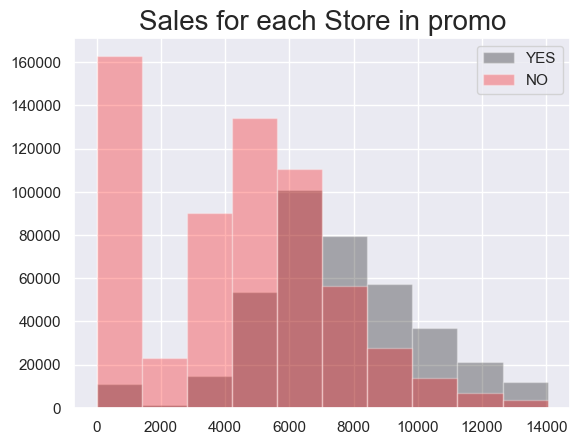

In [91]:
plot_hist_2d(clean_trainScore[clean_trainScore['Promo'] == 1], clean_trainScore[clean_trainScore['Promo'] == 0], 
                  'Sales', 'Sales', 'Sales for each Store in promo', 'YES', 'NO')

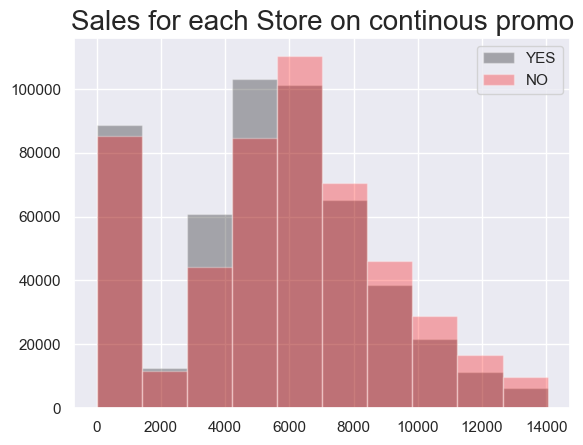

In [92]:
plot_hist_2d(clean_trainScore[clean_trainScore['Promo2'] == 1], clean_trainScore[clean_trainScore['Promo2'] == 0], 'Sales', 
                  'Sales', 'Sales for each Store on continous promo', 'YES', 'NO')

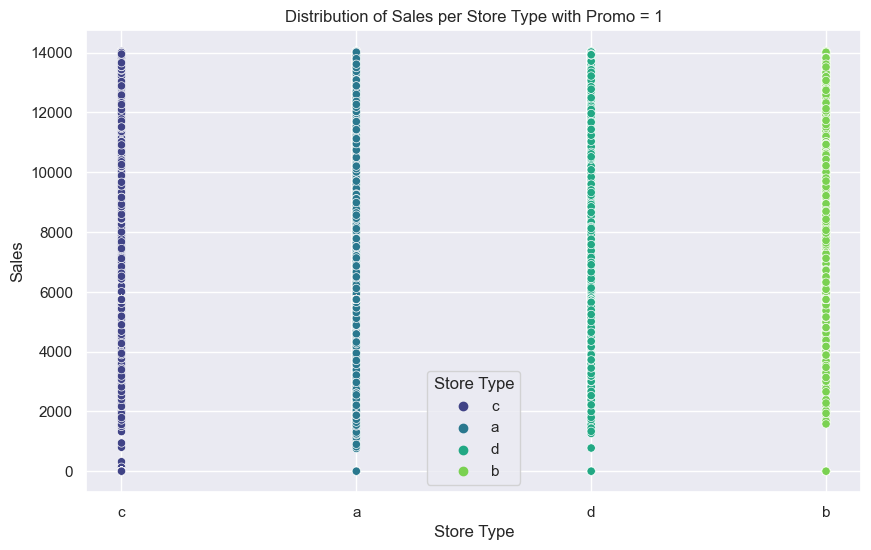

In [93]:
# Filter data for stores with Promo = 1
promos_1 = clean_trainScore[clean_trainScore['Promo'] == 1]

# Plotting scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=promos_1, x='StoreType', y='Sales', hue='StoreType', palette='viridis')
plt.title('Distribution of Sales per Store Type with Promo = 1')
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.legend(title='Store Type')
plt.show()

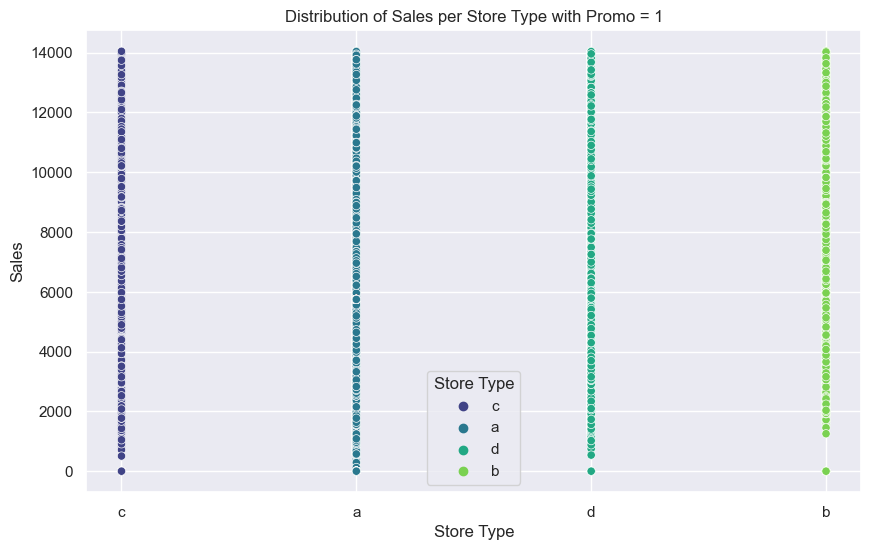

In [94]:
# Filter data for stores with Promo = 0
promos_1 = clean_trainScore[clean_trainScore['Promo'] == 0]

# Plotting scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=promos_1, x='StoreType', y='Sales', hue='StoreType', palette='viridis')
plt.title('Distribution of Sales per Store Type with Promo = 1')
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.legend(title='Store Type')
plt.show()

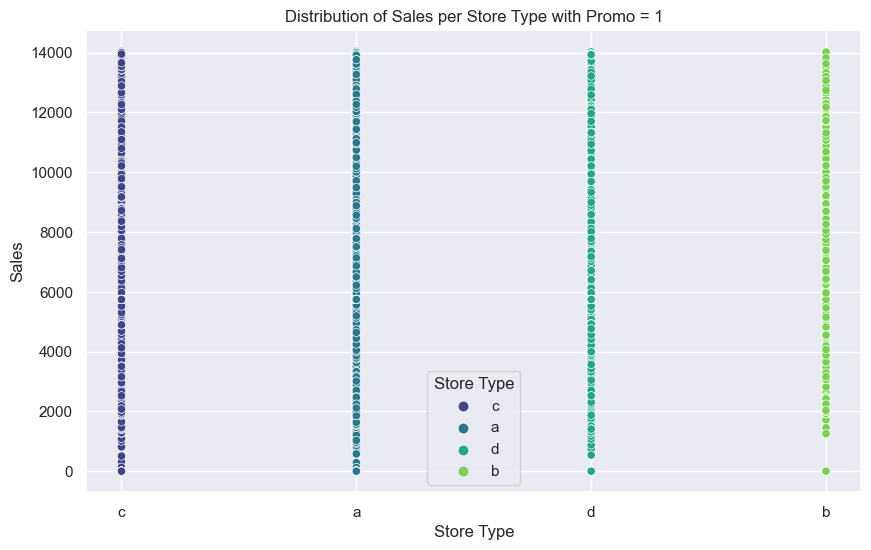

In [95]:
# Filter data for stores with Promo2 = 0
promos_2 = clean_trainScore[clean_trainScore['Promo2'] == 0]

# Plotting scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=promos_2, x='StoreType', y='Sales', hue='StoreType', palette='viridis')
plt.title('Distribution of Sales per Store Type with Promo = 1')
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.legend(title='Store Type')
plt.show()

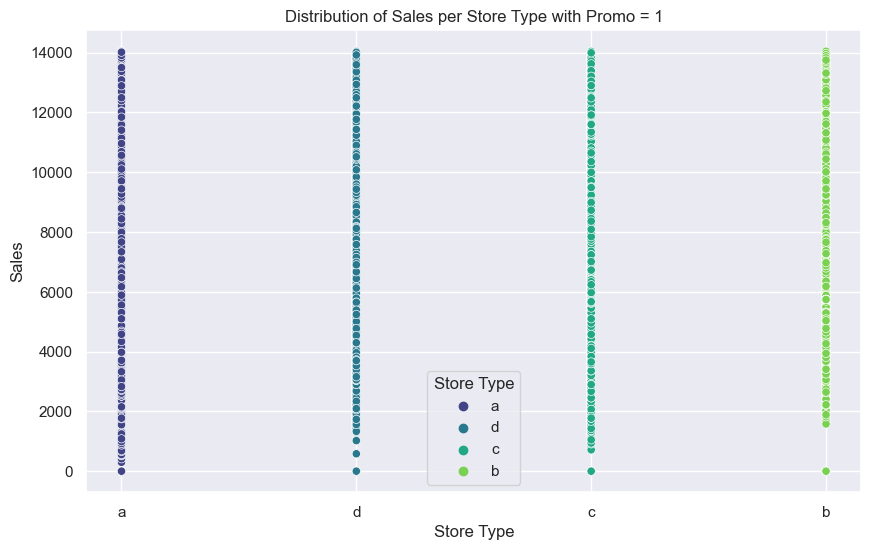

In [96]:
# Filter data for stores with Promo2 = 1
promos_2 = clean_trainScore[clean_trainScore['Promo2'] == 1]

# Plotting scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=promos_2, x='StoreType', y='Sales', hue='StoreType', palette='viridis')
plt.title('Distribution of Sales per Store Type with Promo = 1')
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.legend(title='Store Type')
plt.show()

* The plot suggests the effectiveness of promotions, as a majority of stores exhibit sales values greater than the average. However, approximately 112 stores might benefit from targeted promotions to enhance their revenue.

### Trends of customer behavior during store open and closing times

<Figure size 1000x800 with 0 Axes>

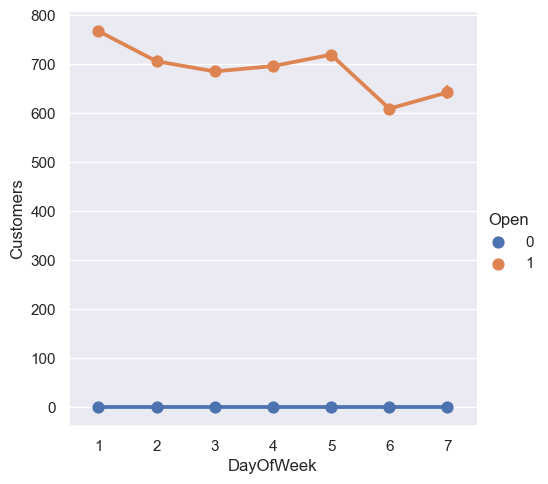

In [97]:
plt.figure(figsize=(10,8))
sns.factorplot(data=clean_trainScore,x='DayOfWeek',y='Customers',hue='Open',sharex=False)

* The graph indicates that the maximum number of customers occurs on one specific day of the week, with a slight increase in sales observed on the last day of the week.

### Which stores are opened on all weekdays? How does that affect their sales on weekends? 

In [98]:
open_stores = clean_trainScore.query('Open == 1 and DayOfWeek > 0 and DayOfWeek < 6')
each_day = open_stores[['StoreType', 'Sales','DayOfWeek']].groupby('StoreType').nunique()
each_day.head()

,Sales,DayOfWeek
StoreType,,
a,12478,5
b,5960,5
c,11554,5
d,11968,5


In [99]:
open_store = clean_trainScore.query('Open == 1 and DayOfWeek > 5 or DayOfWeek < 1')
each_day1 = open_store[['StoreType','Sales', 'DayOfWeek']].groupby('StoreType').nunique()
each_day1.head()

,Sales,DayOfWeek
StoreType,,
a,11288,2
b,3081,2
c,7855,1
d,9221,2


* The observation reveals that stores operate throughout the weekdays. Certain stores exhibit lower sales ('b'), while Store A notably generates higher revenue on weekends. This trend suggests a significant impact of weekend sales on overall income

### Check how the assortment type affects sales

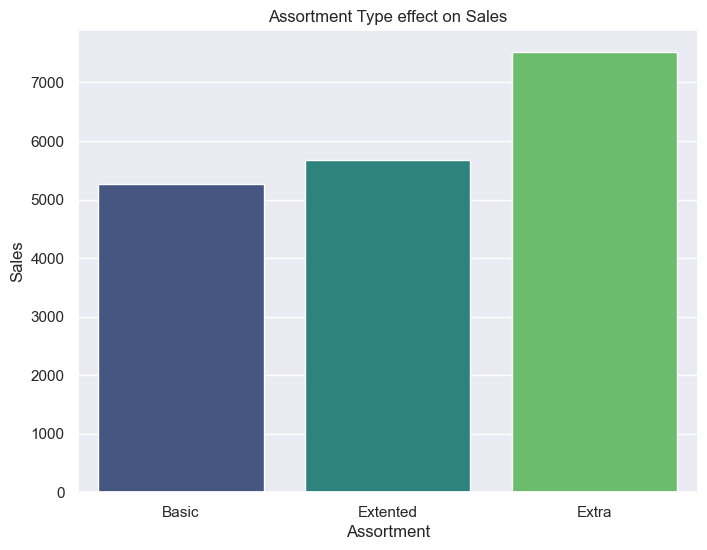

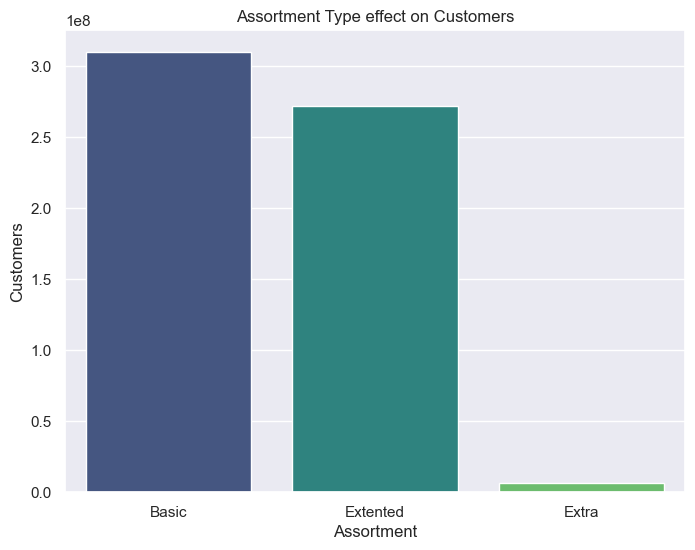

,Assortment,Sales,Customers
0,Basic,5257.261967,309955818.0
1,Extented,5682.692067,272014728.0
2,Extra,7515.126598,6331579.0


In [100]:
temp_df = clean_trainScore.copy()
# Mapping Assortment types to specific names
assortment_names = {'a': 'Basic', 'b': 'Extra', 'c': 'Extented'}
temp_df['Assortment'] = temp_df['Assortment'].map(assortment_names)

# Grouping and aggregating data for Sales and Customers by Assortment types
assortment_agg = temp_df.groupby('Assortment').agg({'Sales': 'mean', 'Customers': 'sum'}).reset_index()

# Plotting Assortment Type effect on Sales using Seaborn with named categories
plt.figure(figsize=(8, 6))
sns.barplot(data=assortment_agg, x='Assortment', y='Sales', palette='viridis')
plt.title('Assortment Type effect on Sales')
plt.xlabel('Assortment')
plt.ylabel('Sales')
plt.show()

# Plotting Assortment Type effect on Customers using Seaborn with named categories
plt.figure(figsize=(8, 6))
sns.barplot(data=assortment_agg, x='Assortment', y='Customers', palette='viridis')
plt.title('Assortment Type effect on Customers')
plt.xlabel('Assortment')
plt.ylabel('Customers')
plt.show()

assortment_agg

* The stores with extra assortment type have high mean sales and lowest customer numbers.

### 	How does the distance to the next competitor affect sales? What if the store and its competitors all happen to be in city centres, does the distance matter in that case?

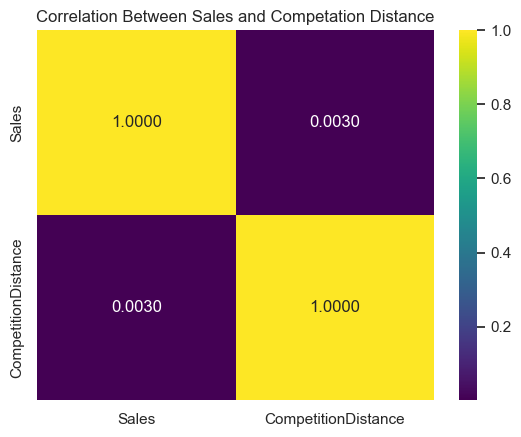

In [101]:
# sales Vs competitioDistance
columns = clean_trainScore[['Sales', 'CompetitionDistance']]
correlation_matrix = columns.corr()

sns.heatmap(correlation_matrix,annot=True, cmap='viridis',fmt='.4f')
plt.title('Correlation Between Sales and Competation Distance')
plt.show()

* As store proximity increases, sales tend to rise, whereas greater distance correlates with lower sales.

### How does the opening or reopening of new competitors affect stores? Check for stores with NA as competitor distance but later on has values for competitor distance

In [102]:
# checking uniqueness
clean_trainScore["CompetitionOpenSinceYear"].unique()

array([2008., 2007., 2006., 2009., 2015., 2013., 2014., 2000., 2011.,
          0., 2010., 2005., 1999., 2003., 2012., 2004., 2002., 1961.,
       1995., 2001., 1990., 1994., 1900., 1998.])

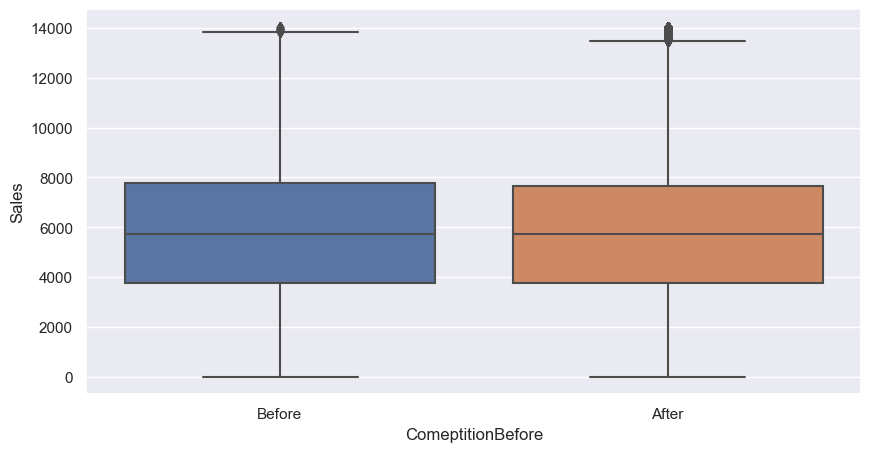

In [103]:
has_open_competition_df = clean_trainScore[clean_trainScore['CompetitionOpenSinceMonth'].notnull()]

has_open_competition_df["CompetitionOpenSinceYear"] = has_open_competition_df["CompetitionOpenSinceYear"].astype("int")
has_open_competition_df["CompetitionOpenSinceMonth"] = has_open_competition_df["CompetitionOpenSinceMonth"].astype("int")


sales_before_competition_open = has_open_competition_df[(has_open_competition_df["Year"] < 
                                                         has_open_competition_df["CompetitionOpenSinceYear"]) & 
                                                        (has_open_competition_df["Month"] < 
                                                         has_open_competition_df["CompetitionOpenSinceMonth"])]

sales_after_competition_open = has_open_competition_df[(has_open_competition_df["Year"] >= 
                                                        has_open_competition_df["CompetitionOpenSinceYear"]) & 
                                                       (has_open_competition_df["Month"] >= 
                                                        has_open_competition_df["CompetitionOpenSinceMonth"])]

sales_before_competition_open["ComeptitionBefore"]="Before"
sales_after_competition_open["ComeptitionBefore"]="After"

competition_sales_data=pd.concat([sales_before_competition_open,sales_after_competition_open])

plt.figure(figsize=(10, 5))
sns.boxplot(x='ComeptitionBefore', y='Sales', data=competition_sales_data);

* Number of sales increase when the competitors are opened.

### Summary of the EDA on the Time Series Data
* The most selling and crowded StoreType is A.
* The best "Sale per Customer" StoreType D indicates to the higher Buyer Cart. To benefit from this fact, Rossmann can consider proposing bigger variety of its products.
* Low SalePerCustomer amount for StoreType B indicates to the possible fact that people shop there essentially for "small" things. Eventhough this StoreType generated the least amount of sales and customers over the whole period, it shows a great potential.
* Customers tends to buy more on Modays when there's one promotion (Promo) and on Sundays when there's no promotion at all (both Promo and Promo1 are equal to 0).
* Promo2 alone doesn't seem to be correlated to any significant change in the Sales amount.

# Task 1.2 Logging

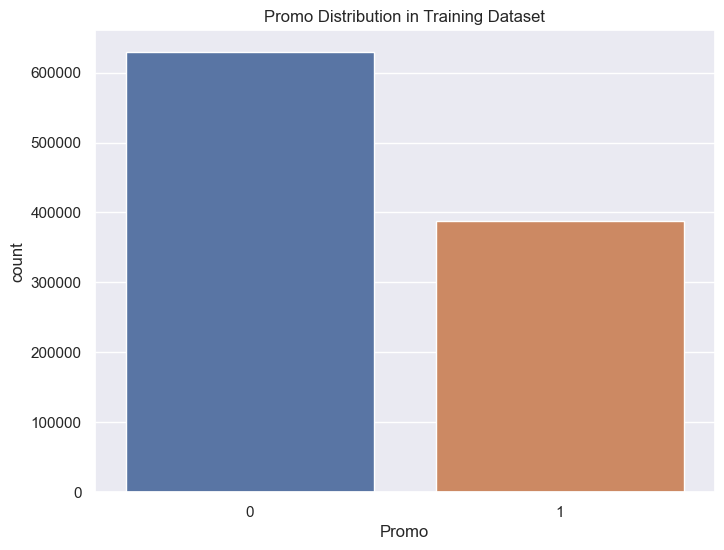

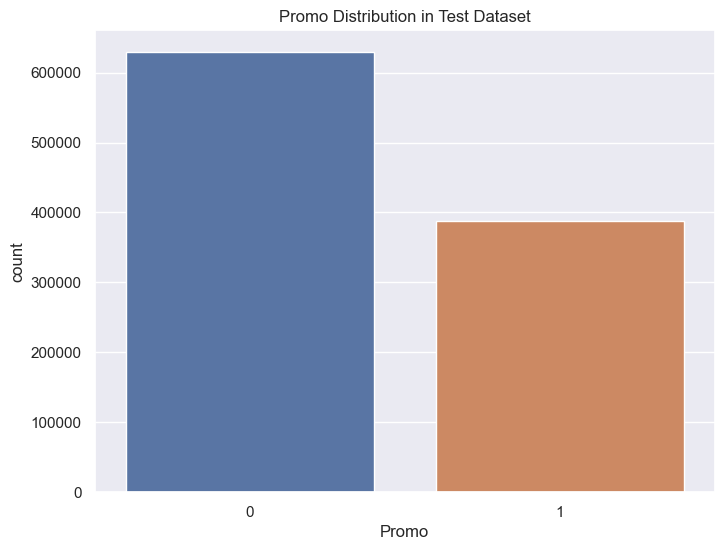

In [104]:
# Configure the logger
logging.basicConfig(filename='PharmaceuticalSalesLogger.log',
                    level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s',
                    datefmt='%d-%b-%y')

# Get the logger
logger = logging.getLogger()

# Plotting 'Promo' distribution in the training dataset
try:
    logger.info('Plotting Promo distribution in the training dataset...')
    plt.figure(figsize=(8, 6))
    sns.countplot(data=clean_trainScore_df, x='Promo')
    plt.title('Promo Distribution in Training Dataset')
    plt.show()
    logger.info('Plotting completed: Promo distribution in the training dataset.')
except Exception as e:
    logger.error(f'Error plotting Promo distribution in the training dataset: {e}')

# Plotting 'Promo' distribution in the test dataset
try:
    logger.info('Plotting Promo distribution in the test dataset...')
    plt.figure(figsize=(8, 6))
    sns.countplot(data=test, x='Promo')
    plt.title('Promo Distribution in Test Dataset')
    plt.show()
    logger.info('Plotting completed: Promo distribution in the test dataset.')
except Exception as e:
    logger.error(f'Error plotting Promo distribution in the test dataset: {e}')


In [106]:
# Function to convert values in 'StateHoliday' column
def convert_state_holiday_column(data):
    try:
        logger.info('Converting values in StateHoliday column...')
        # Converting '0' to integer
        data['StateHoliday'] = data['StateHoliday'].replace({'0': 0})
        # Mapping other values for better interpretation
        data['StateHoliday'] = data['StateHoliday'].replace({0: 'No Holiday', 'a': 'Public Holiday', 'b': 'Easter Holiday', 'c': 'Christmas'})
        logger.info('Values converted in StateHoliday column.')
    except Exception as e:
        logger.error(f'Error converting values in StateHoliday column: {e}')

# Example usage with clean_trainScore dataframe
convert_state_holiday_column(clean_trainScore)

In [107]:
# Calculateing mean sales for each StateHoliday
holiday_sales = clean_trainScore.groupby('StateHoliday')['Sales'].mean().reset_index()


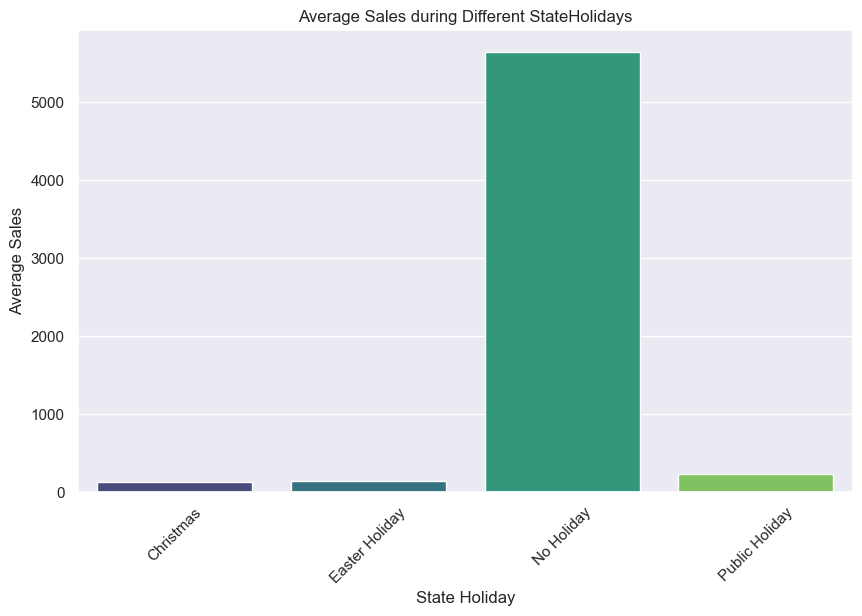

In [109]:
def plot_sales_behavior(data):
    try:
        logger.info('Plotting sales behavior for each StateHoliday...')
        plt.figure(figsize=(10, 6))
        sns.barplot(data=data, x='StateHoliday', y='Sales', palette='viridis')
        plt.title('Average Sales during Different StateHolidays')
        plt.xlabel('State Holiday')
        plt.ylabel('Average Sales')
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
        plt.show()
        logger.info('Sales behavior plotted for each StateHoliday.')
    except Exception as e:
        logger.error(f'Error plotting sales behavior for each StateHoliday: {e}')

# Example usage with holiday_sales dataframe
plot_sales_behavior(holiday_sales)

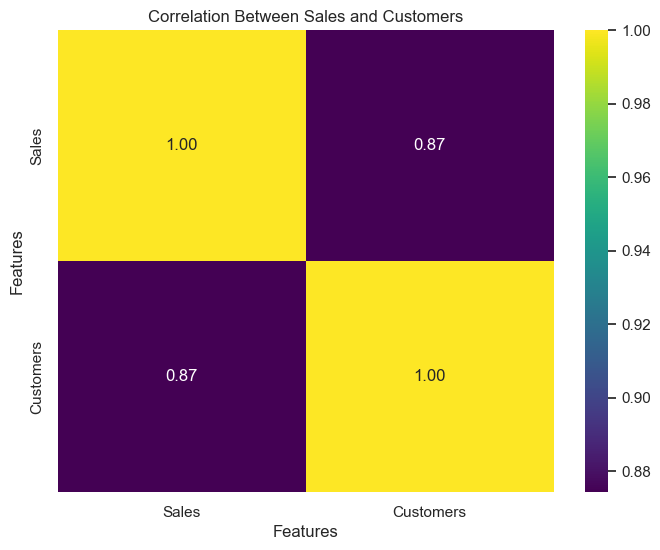

In [110]:
try:
    # Calculate the correlation matrix
    logger.info('Calculating the correlation matrix...')
    correlation_matrix = clean_trainScore[['Sales', 'Customers']].corr()
    logger.info('Correlation matrix calculated.')

    # Plotting the heatmap
    logger.info('Plotting the heatmap...')
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
    plt.title('Correlation Between Sales and Customers')
    plt.xlabel('Features')
    plt.ylabel('Features')
    plt.show()
    logger.info('Heatmap plotted: Correlation between Sales and Customers.')
except Exception as e:
    logger.error(f'Error: {e}')

<Figure size 1200x700 with 0 Axes>

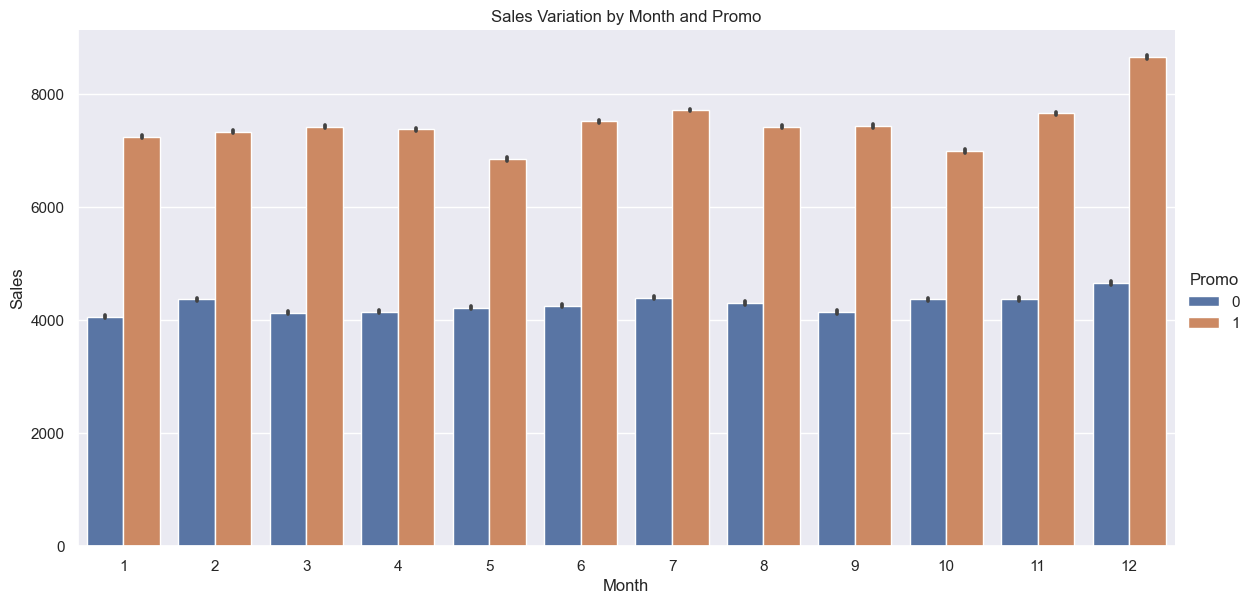

In [111]:
try:
    logger.info('Creating a factor plot for Sales based on Month and Promo...')
    plt.figure(figsize=(12, 7))
    sns.catplot(data=clean_trainScore, x="Month", y="Sales", hue='Promo', kind='bar', height=6, aspect=2)
    plt.title('Sales Variation by Month and Promo')
    plt.xlabel('Month')
    plt.ylabel('Sales')
    plt.show()
    logger.info('Factor plot created for Sales based on Month and Promo.')
except Exception as e:
    logger.error(f'Error creating factor plot: {e}')

<Figure size 1200x700 with 0 Axes>

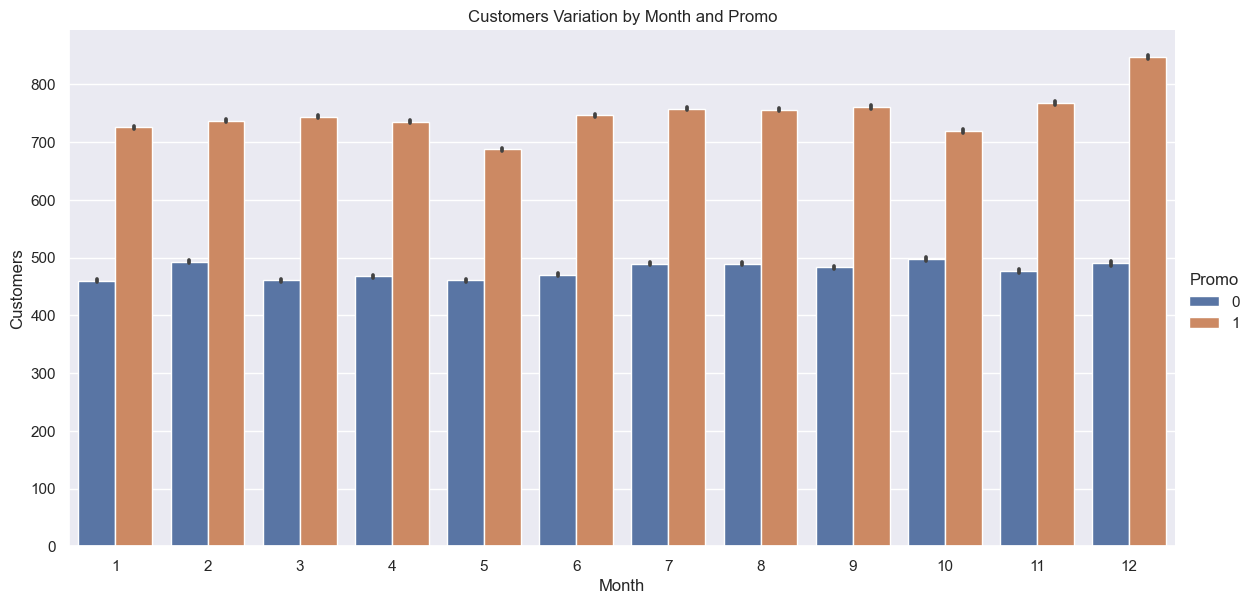

In [112]:
try:
    logger.info('Creating a factor plot for Customers based on Month and Promo...')
    plt.figure(figsize=(12, 7))
    sns.catplot(data=clean_trainScore, x="Month", y="Customers", hue='Promo', kind='bar', height=6, aspect=2)
    plt.title('Customers Variation by Month and Promo')
    plt.xlabel('Month')
    plt.ylabel('Customers')
    plt.show()
    logger.info('Factor plot created for Customers based on Month and Promo.')
except Exception as e:
    logger.error(f'Error creating factor plot for Customers: {e}')

In [113]:
def plot_hist_2d(df1: pd.DataFrame, df2: pd.DataFrame, x_col: str, y_col: str, title: str, label1, label2) -> None:
    try:
        logger.info(f'Creating 2D histogram for {x_col} and {y_col}...')
        sns.set()
        plt.hist(df1[x_col], color='black', alpha=0.3, label=label1)
        plt.hist(df2[y_col], color='red', alpha=0.3, label=label2)
        plt.legend()
        plt.plot()
        plt.title(title, size=20)
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.show()
        logger.info(f'2D histogram for {x_col} and {y_col} created.')
    except Exception as e:
        logger.error(f'Error creating 2D histogram: {e}')

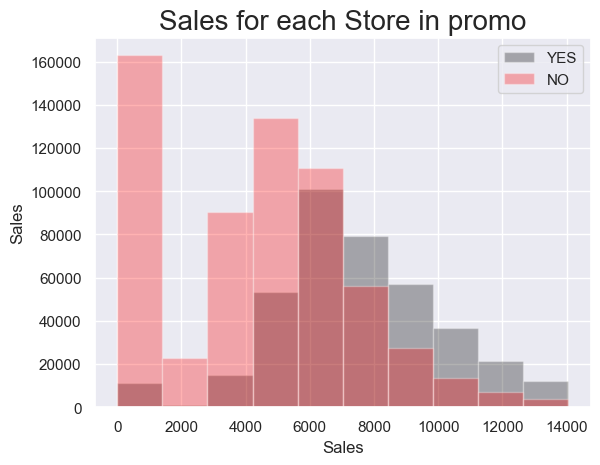

In [114]:
logging.basicConfig(filename='PharmaceuticalSalesLogger.log',
                    level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s',
                    datefmt='%d-%b-%y')

plot_hist_2d(clean_trainScore[clean_trainScore['Promo'] == 1], clean_trainScore[clean_trainScore['Promo'] == 0], 
                  'Sales', 'Sales', 'Sales for each Store in promo', 'YES', 'NO')

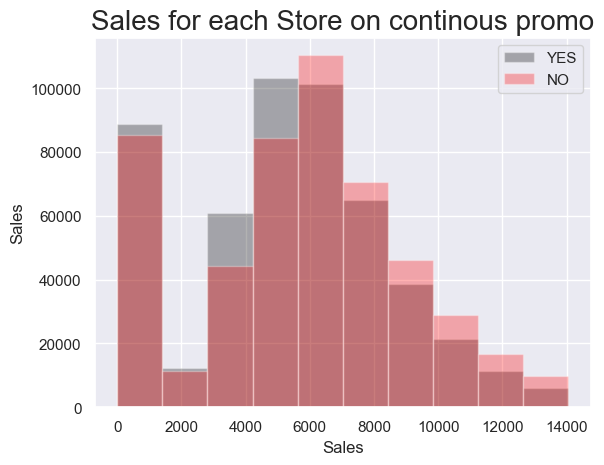

In [115]:
logging.basicConfig(filename='PharmaceuticalSalesLogger.log',
                    level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s',
                    datefmt='%d-%b-%y')


plot_hist_2d(clean_trainScore[clean_trainScore['Promo2'] == 1], clean_trainScore[clean_trainScore['Promo2'] == 0], 'Sales', 
                  'Sales', 'Sales for each Store on continous promo', 'YES', 'NO')

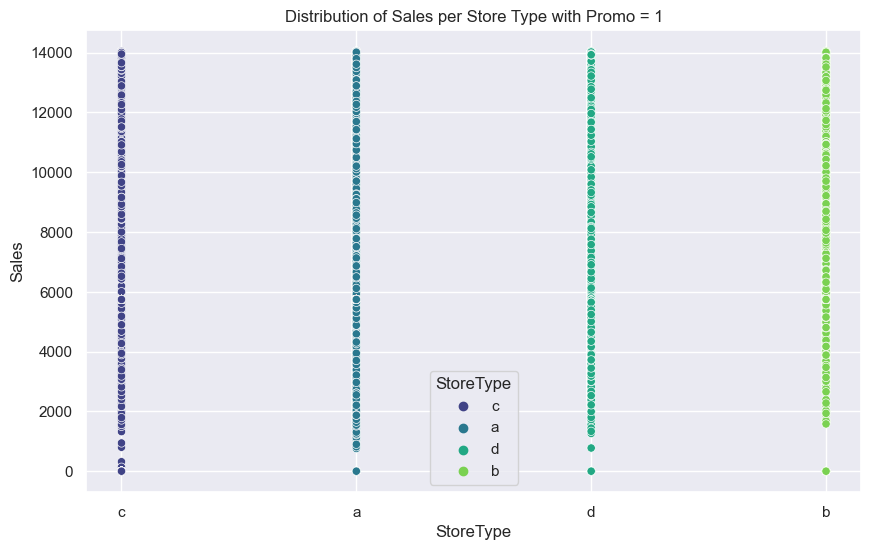

In [119]:

def plot_scatter_with_promo(data, x_col, y_col, hue_col, title):
    try:
        logger.info(f'Creating scatterplot for {y_col} vs {x_col} with hue {hue_col}...')
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=data, x=x_col, y=y_col, hue=hue_col, palette='viridis')
        plt.title(title)
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.legend(title=hue_col)
        plt.show()
        logger.info(f'Scatterplot created for {y_col} vs {x_col} with hue {hue_col}.')
    except Exception as e:
        logger.error(f'Error creating scatterplot: {e}')


        promos_1 = clean_trainScore[clean_trainScore['Promo'] == 1]
plot_scatter_with_promo(promos_1, 'StoreType', 'Sales', 'StoreType', 'Distribution of Sales per Store Type with Promo = 1')

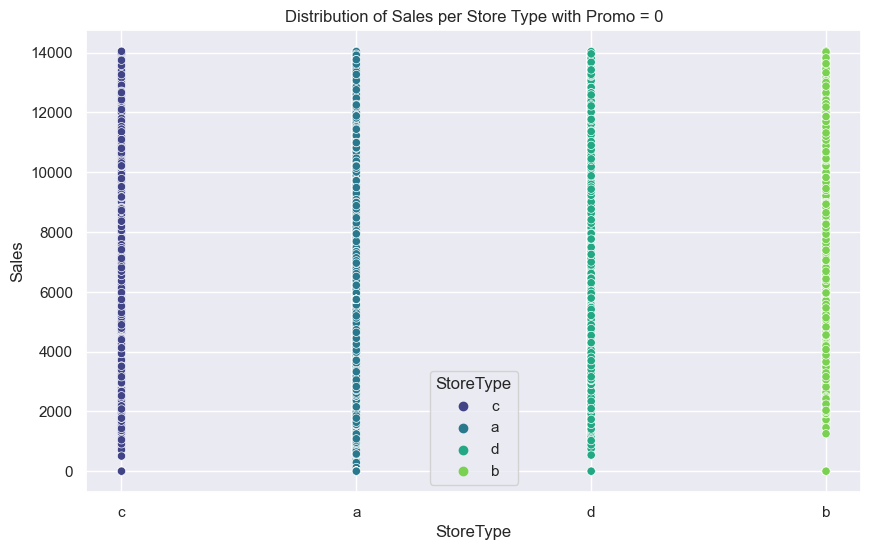

In [120]:
def plot_scatter_without_promo(data, x_col, y_col, hue_col, title):
    try:
        logger.info(f'Creating scatterplot for {y_col} vs {x_col} with hue {hue_col}...')
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=data, x=x_col, y=y_col, hue=hue_col, palette='viridis')
        plt.title(title)
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.legend(title=hue_col)
        plt.show()
        logger.info(f'Scatterplot created for {y_col} vs {x_col} with hue {hue_col}.')
    except Exception as e:
        logger.error(f'Error creating scatterplot: {e}')
promos_0 = clean_trainScore[clean_trainScore['Promo'] == 0]
plot_scatter_without_promo(promos_0, 'StoreType', 'Sales', 'StoreType', 'Distribution of Sales per Store Type with Promo = 0')

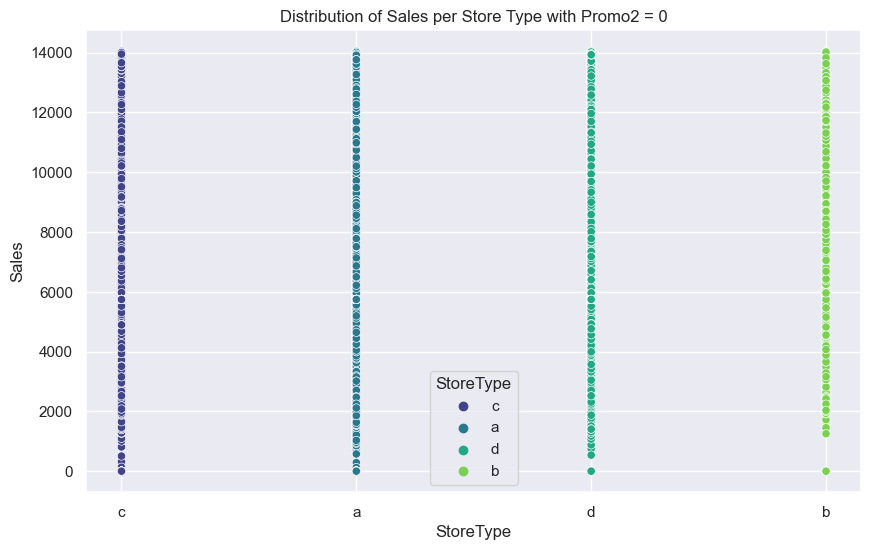

In [121]:
def plot_scatter_promo2_zero(data, x_col, y_col, hue_col, title):
    try:
        logger.info(f'Creating scatterplot for {y_col} vs {x_col} with hue {hue_col} where Promo2 = 0...')
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=data, x=x_col, y=y_col, hue=hue_col, palette='viridis')
        plt.title(title)
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.legend(title=hue_col)
        plt.show()
        logger.info(f'Scatterplot created for {y_col} vs {x_col} with hue {hue_col} where Promo2 = 0.')
    except Exception as e:
        logger.error(f'Error creating scatterplot: {e}')

promos_2 = clean_trainScore[clean_trainScore['Promo2'] == 0]
plot_scatter_promo2_zero(promos_2, 'StoreType', 'Sales', 'StoreType', 'Distribution of Sales per Store Type with Promo2 = 0')

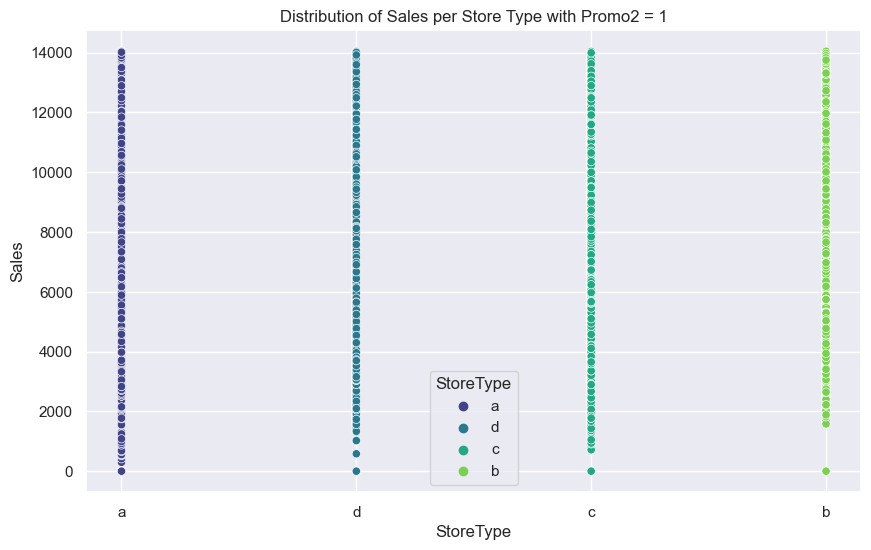

In [122]:
def plot_scatter_promo2_one(data, x_col, y_col, hue_col, title):
    try:
        logger.info(f'Creating scatterplot for {y_col} vs {x_col} with hue {hue_col} where Promo2 = 1...')
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=data, x=x_col, y=y_col, hue=hue_col, palette='viridis')
        plt.title(title)
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.legend(title=hue_col)
        plt.show()
        logger.info(f'Scatterplot created for {y_col} vs {x_col} with hue {hue_col} where Promo2 = 1.')
    except Exception as e:
        logger.error(f'Error creating scatterplot: {e}')


promos_2 = clean_trainScore[clean_trainScore['Promo2'] == 1]
plot_scatter_promo2_one(promos_2, 'StoreType', 'Sales', 'StoreType', 'Distribution of Sales per Store Type with Promo2 = 1')

<Figure size 1000x800 with 0 Axes>

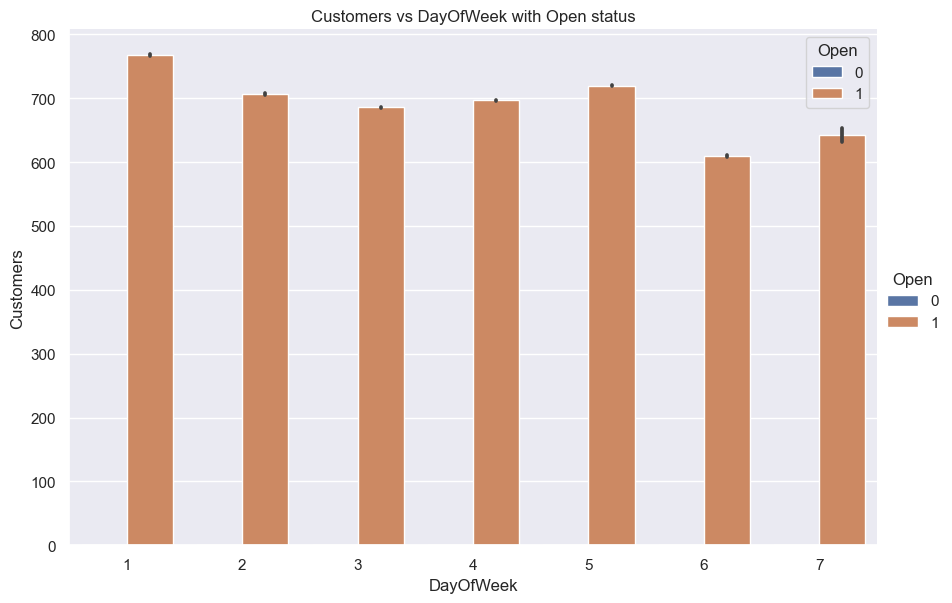

In [124]:
def plot_factor_customers_day_open(data, x_col, y_col, hue_col, title):
           
    try:
        logger.info(f'Creating factor plot for {y_col} vs {x_col} with hue {hue_col}...')
        plt.figure(figsize=(10, 8))
        sns.catplot(data=data, x=x_col, y=y_col, hue=hue_col, kind='bar', height=6, aspect=1.5)
        plt.title(title)
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.legend(title=hue_col)
        plt.show()
        logger.info(f'Factor plot created for {y_col} vs {x_col} with hue {hue_col}.')
    except Exception as e:
        logger.error(f'Error creating factor plot: {e}')


plot_factor_customers_day_open(clean_trainScore, 'DayOfWeek', 'Customers', 'Open', 'Customers vs DayOfWeek with Open status')

In [125]:
try:
    logger.info('Performing query and aggregation for each_day...')
    open_stores = clean_trainScore.query('Open == 1 and DayOfWeek > 0 and DayOfWeek < 6')
    each_day = open_stores[['StoreType', 'Sales', 'DayOfWeek']].groupby('StoreType').nunique()
    logger.info('Query and aggregation for each_day completed.')
    logger.info(f'each_day: \n{each_day.head()}')  # Logging the resulting DataFrame head
except Exception as e:
    logger.error(f'Error performing query and aggregation for each_day: {e}')

In [126]:
try:
    logger.info('Performing query and aggregation for each_day1...')
    open_store = clean_trainScore.query('Open == 1 and (DayOfWeek > 5 or DayOfWeek < 1)')
    each_day1 = open_store[['StoreType', 'Sales', 'DayOfWeek']].groupby('StoreType').nunique()
    logger.info('Query and aggregation for each_day1 completed.')
    logger.info(f'each_day1: \n{each_day1.head()}')  # Logging the resulting DataFrame head
except Exception as e:
    logger.error(f'Error performing query and aggregation for each_day1: {e}')

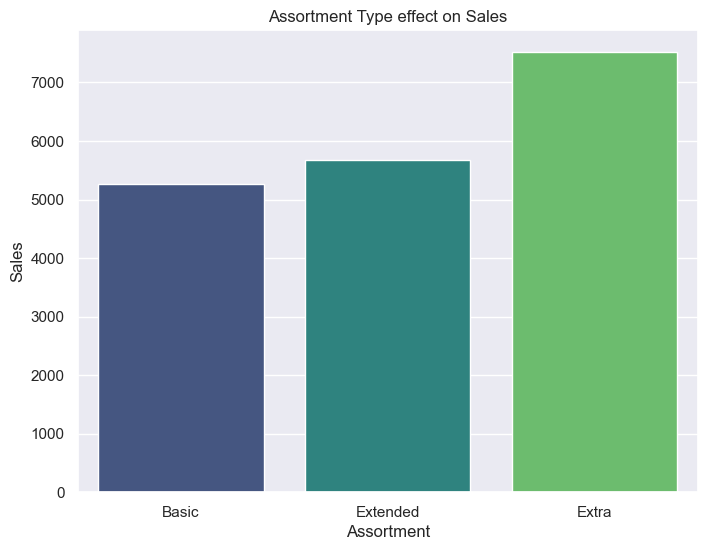

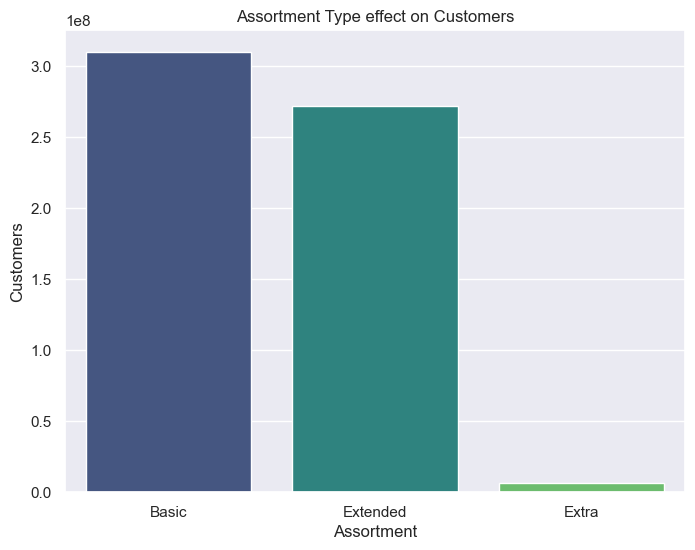

In [127]:
try:
    logger.info('Mapping Assortment types to specific names...')
    temp_df = clean_trainScore.copy()
    assortment_names = {'a': 'Basic', 'b': 'Extra', 'c': 'Extended'}
    temp_df['Assortment'] = temp_df['Assortment'].map(assortment_names)
    logger.info('Mapping completed.')

    logger.info('Grouping and aggregating data for Sales and Customers by Assortment types...')
    assortment_agg = temp_df.groupby('Assortment').agg({'Sales': 'mean', 'Customers': 'sum'}).reset_index()
    logger.info('Grouping and aggregation completed.')

    logger.info('Plotting Assortment Type effect on Sales...')
    plt.figure(figsize=(8, 6))
    sns.barplot(data=assortment_agg, x='Assortment', y='Sales', palette='viridis')
    plt.title('Assortment Type effect on Sales')
    plt.xlabel('Assortment')
    plt.ylabel('Sales')
    plt.show()
    logger.info('Sales plot created.')

    logger.info('Plotting Assortment Type effect on Customers...')
    plt.figure(figsize=(8, 6))
    sns.barplot(data=assortment_agg, x='Assortment', y='Customers', palette='viridis')
    plt.title('Assortment Type effect on Customers')
    plt.xlabel('Assortment')
    plt.ylabel('Customers')
    plt.show()
    logger.info('Customers plot created.')

    logger.info('Displaying assortment_agg DataFrame:')
    logger.info(f'{assortment_agg}')
except Exception as e:
    logger.error(f'Error occurred: {e}')

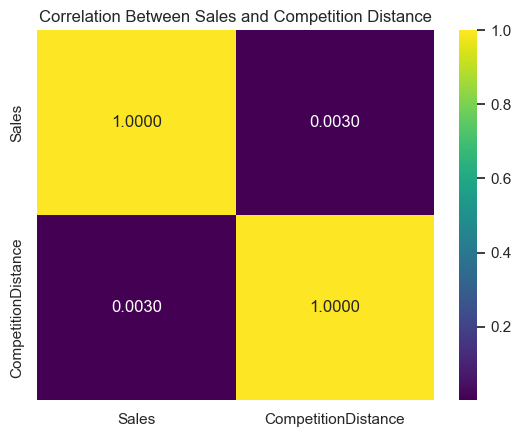

In [128]:
try:
    logger.info('Calculating correlation between Sales and CompetitionDistance...')
    columns = clean_trainScore[['Sales', 'CompetitionDistance']]
    correlation_matrix = columns.corr()

    logger.info('Plotting heatmap for correlation...')
    sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.4f')
    plt.title('Correlation Between Sales and Competition Distance')
    plt.show()
    logger.info('Heatmap for correlation created.')
except Exception as e:
    logger.error(f'Error occurred: {e}')

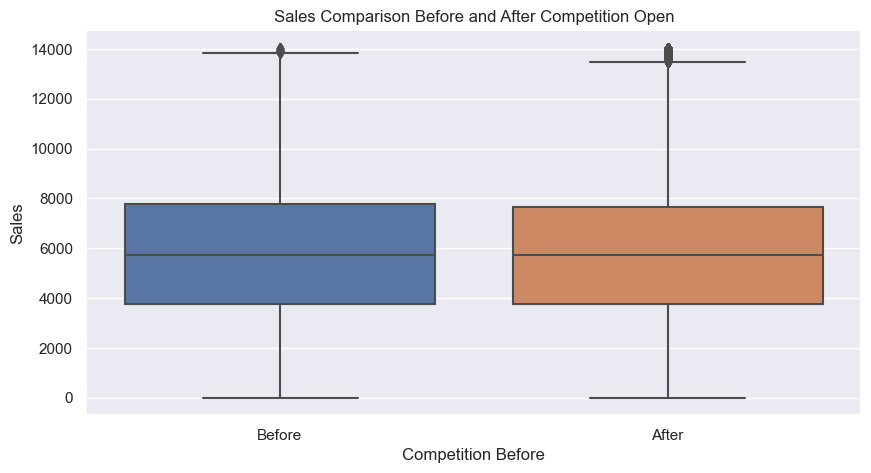

In [134]:
try:
    logger.info('Filtering data for stores with CompetitionOpenSinceMonth not null...')
    has_open_competition_df = clean_trainScore[clean_trainScore['CompetitionOpenSinceMonth'].notnull()]

    logger.info('Converting CompetitionOpenSinceYear and CompetitionOpenSinceMonth to integers...')
    has_open_competition_df["CompetitionOpenSinceYear"] = has_open_competition_df["CompetitionOpenSinceYear"].astype("int")
    has_open_competition_df["CompetitionOpenSinceMonth"] = has_open_competition_df["CompetitionOpenSinceMonth"].astype("int")

    logger.info('Filtering sales before and after Competition Open...')
    sales_before_competition_open = has_open_competition_df[(has_open_competition_df["Year"] < has_open_competition_df["CompetitionOpenSinceYear"]) & 
                                                            (has_open_competition_df["Month"] < has_open_competition_df["CompetitionOpenSinceMonth"])]

    sales_after_competition_open = has_open_competition_df[(has_open_competition_df["Year"] >= has_open_competition_df["CompetitionOpenSinceYear"]) & 
                                                           (has_open_competition_df["Month"] >= has_open_competition_df["CompetitionOpenSinceMonth"])]

    logger.info('Labeling data for before and after Competition Open...')
    sales_before_competition_open["CompetitionBefore"] = "Before"
    sales_after_competition_open["CompetitionBefore"] = "After"

    logger.info('Concatenating sales data before and after Competition Open...')
    competition_sales_data = pd.concat([sales_before_competition_open, sales_after_competition_open])

    logger.info('Creating boxplot for Competition Before and After Sales...')
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='CompetitionBefore', y='Sales', data=competition_sales_data)
    plt.xlabel('Competition Before')
    plt.ylabel('Sales')
    plt.title('Sales Comparison Before and After Competition Open')
    plt.show()
    logger.info('Boxplot created for Competition Before and After Sales.')
except Exception as e:
    logger.error(f'Error occurred: {e}')